# Prediksi Harga Rumah di Melbourne Menggunakan Regresi Linear dan Regresi Polinomial

## Deskripsi Proyek

Dokumen ini menyajikan implementasi metode **Regresi Linear** dan **Regresi Polinomial** untuk memprediksi harga rumah di Melbourne, Australia, berdasarkan dataset yang bersumber dari [Kaggle - Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

Proyek ini bertujuan untuk membangun model prediktif yang dapat mengestimasi harga rumah berdasarkan berbagai fitur seperti jumlah kamar, luas tanah, jarak dari pusat kota (CBD), serta area pemerintahan setempat (*Council Area*). Seluruh proses dilakukan secara sistematis melalui pipeline *machine learning* yang lengkap, serta dilengkapi dengan analisis data dan penjelasan matematis dari masing-masing model.

---

## Informasi Dataset

Dataset ini berisi informasi properti di Melbourne yang diperoleh dari hasil *web scraping* situs Domain.com.au. Beberapa fitur penting yang tersedia dalam dataset meliputi:

- **Suburb**: Nama wilayah pinggiran kota
- **Address**: Alamat lengkap properti
- **Rooms**: Jumlah ruangan
- **Price**: Harga properti (dalam dolar Australia)
- **Method**: Metode penjualan
- **Type**: Tipe properti (house, unit, townhouse, dll.)
- **SellerG**: Agen penjual
- **Date**: Tanggal penjualan
- **Distance**: Jarak dari Central Business District (CBD)
- **Regionname**: Wilayah umum (West, North, dll.)
- **Propertycount**: Jumlah properti yang ada di wilayah tersebut
- **Bedroom2**: Jumlah kamar tidur
- **Bathroom**: Jumlah kamar mandi
- **Car**: Jumlah tempat parkir mobil
- **Landsize**: Luas tanah (m²)
- **BuildingArea**: Luas bangunan (m²)
- **YearBuilt**: Tahun dibangun
- **CouncilArea**: Pemerintah daerah yang mengatur wilayah
- **Latitude / Longitude**: Koordinat geografis

---

## Alur Proyek (*Project Pipeline*)

1. **Inisialisasi dan Impor Library**  
   Pemanggilan seluruh library yang dibutuhkan seperti NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, dan lainnya.

2. **Definisi Variabel Global dan Konfigurasi**  
   Penetapan seed random, konfigurasi grafik, dan pengaturan lainnya untuk menjamin reproduktibilitas.

3. **Langkah 1: Pemuatan Dataset**  
   Dataset dimuat ke dalam format DataFrame untuk kemudian dilakukan analisis lebih lanjut.

4. **Langkah 2: Eksplorasi Data Awal (*Exploratory Data Analysis*)**  
   - Analisis deskriptif numerik dan kategorikal  
   - Visualisasi distribusi harga, jumlah kamar, luas tanah, dan variabel penting lainnya  
   - Identifikasi nilai yang hilang (*missing values*) dan pencilan (*outliers*)

5. **Langkah 3: Pra-pemrosesan Data**  
   - Penanganan data hilang  
   - Transformasi fitur kategorikal menjadi numerik  
   - Normalisasi atau standardisasi data  
   - Seleksi fitur relevan untuk model

6. **Langkah 4: Pembagian Data (Train-Test Split)**  
   Dataset dibagi menjadi data pelatihan dan data pengujian dengan rasio tertentu (contoh: 80:20).

7. **Langkah 5: Penjelasan Model dan Proses Pelatihan**  
   - **Regresi Linear**  
     Penjelasan matematis dan implementasi model regresi linear sederhana.  
   - **Regresi Polinomial**  
     Penjelasan pendekatan non-linear menggunakan transformasi polinomial dari fitur input.  
   - Pelatihan kedua model menggunakan data latih

8. **Langkah 6: Evaluasi Model**  
   Evaluasi dilakukan menggunakan metrik seperti:
   - Mean Absolute Error (MAE)  
   - Mean Squared Error (MSE)  
   - R² Score

9. **Langkah 7: Visualisasi Hasil Prediksi**  
   Grafik perbandingan antara nilai aktual dan hasil prediksi, serta visualisasi distribusi kesalahan.

10. **Langkah 8: Analisis Tingkat Kepentingan Fitur (*Feature Importance*)**  
    Analisis fitur-fitur mana yang paling berpengaruh terhadap hasil prediksi harga rumah.

11. **Langkah 9: Penyimpanan Model dan Pra-pemroses**  
    Model regresi dan preprocessor disimpan dalam format `.pkl` atau `.joblib` untuk digunakan kembali di masa mendatang.

---

## Referensi

- Dataset: [Melbourne Housing Market - Kaggle](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data)  
- Scikit-learn Documentation: https://scikit-learn.org  
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Géron, 2019)  
- Statistik dan Analisis Numerik dalam Python (Berbagai sumber)

---

## Inisialisasi dan Impor Library

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import time
import warnings
import joblib
import os
from IPython.display import display, Markdown
from matplotlib.patches import Patch

# Atur agar warning tidak ditampilkan untuk output yang lebih bersih
warnings.filterwarnings('ignore')

# Atur style untuk plot
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

print("Library telah diimpor dan pengaturan telah dikonfigurasi.")

Library telah diimpor dan pengaturan telah dikonfigurasi.


## Definisi Variabel Global dan Konfigurasi

In [65]:
DATA_FILEPATH = './data/Melbourne_housing_FULL.csv'
MODELS_DIR = './models'

# Daftar kolom berdasarkan tipe
NUMERICAL_COLS = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom',
                  'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
                  'Propertycount']
CATEGORICAL_COLS = ['Type', 'Method', 'Regionname', 'CouncilArea']
TARGET_COL = 'Price'

# Deskripsi kolom (untuk referensi)
COLUMN_DESCRIPTIONS = {
    'Suburb': 'Nama suburb',
    'Address': 'Alamat jalan',
    'Rooms': 'Jumlah total kamar',
    'Price': 'Harga jual (target)',
    'Method': 'Metode penjualan (S, SP, dll.)',
    'Type': 'Tipe properti (h, u, t)',
    'SellerG': 'Agen real estate',
    'Date': 'Tanggal penjualan',
    'Distance': 'Jarak dari CBD (km)',
    'Regionname': 'Wilayah umum',
    'Propertycount': 'Jumlah properti di suburb',
    'Bedroom2': 'Jumlah kamar tidur (sumber alternatif)',
    'Bathroom': 'Jumlah kamar mandi',
    'Car': 'Jumlah tempat parkir mobil',
    'Landsize': 'Luas tanah (m2)',
    'BuildingArea': 'Luas bangunan (m2)',
    'YearBuilt': 'Tahun dibangun',
    'CouncilArea': 'Wilayah dewan pemerintahan',
    'Lattitude': 'Latitude',
    'Longtitude': 'Longitude'
}

METHOD_CODES = {
    'S': 'Properti terjual', 'SP': 'Properti terjual sebelum lelang', 'PI': 'Dilewati (tidak terjual saat lelang)',
    'PN': 'Terjual sebelumnya, harga tidak diungkapkan', 'SN': 'Terjual, harga tidak diungkapkan',
    'NB': 'Tidak ada tawaran', 'VB': 'Tawaran dari penjual', 'W': 'Ditarik sebelum lelang',
    'SA': 'Terjual setelah lelang', 'SS': 'Terjual setelah lelang, harga tidak diungkapkan',
    'N/A': 'Tidak tersedia'
}

TYPE_CODES = {
    'h': 'Rumah, pondok, villa', 'u': 'Unit, duplex', 't': 'Townhouse',
    'dev site': 'Situs pengembangan', 'o res': 'Residensial lainnya'
}

# Pastikan direktori data dan model ada
if not os.path.exists('./data'):
    os.makedirs('./data')
    print("Direktori './data' dibuat. Silakan letakkan 'Melbourne_housing_FULL.csv' di sana.")

if not os.path.exists(MODELS_DIR):
    os.makedirs(MODELS_DIR)

print(f"Path file data: {DATA_FILEPATH}")
print(f"Direktori model: {MODELS_DIR}")

Path file data: ./data/Melbourne_housing_FULL.csv
Direktori model: ./models


## Langkah 1: Pemuatan Data
Memuat dataset perumahan Melbourne dari file CSV.

In [66]:
df_raw = None
if not os.path.exists(DATA_FILEPATH):
    print(f"Dataset tidak ditemukan di '{DATA_FILEPATH}'.")
    print("Pastikan file 'Melbourne_housing_FULL.csv' ada di direktori './data/' atau perbarui DATA_FILEPATH.")
    print("Eksekusi pipeline akan dihentikan.")
else:
    try:
        start_time = time.time()
        df_raw = pd.read_csv(DATA_FILEPATH)
        print(f"Data berhasil dimuat. Shape: {df_raw.shape}")
        print(f"Waktu pemuatan: {time.time() - start_time:.2f} detik")

        print("\n5 baris pertama dari dataset:")
        display(df_raw.head())

        print("\nDeskripsi Kolom Dataset:")
        desc_df = pd.DataFrame(list(COLUMN_DESCRIPTIONS.items()), columns=['Kolom', 'Deskripsi'])
        display(desc_df)

    except Exception as e:
        print(f"Terjadi kesalahan tak terduga saat memuat data: {e}")
        df_raw = None

df = df_raw.copy() if df_raw is not None else None

Data berhasil dimuat. Shape: (34857, 21)
Waktu pemuatan: 0.09 detik

5 baris pertama dari dataset:


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5000,3067.0000,...,1.0000,1.0000,126.0000,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0000
1,Abbotsford,85 Turner St,2,h,1480000.0000,S,Biggin,3/12/2016,2.5000,3067.0000,...,1.0000,1.0000,202.0000,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0000
2,Abbotsford,25 Bloomburg St,2,h,1035000.0000,S,Biggin,4/02/2016,2.5000,3067.0000,...,1.0000,0.0000,156.0000,79.0000,1900.0000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5000,3067.0000,...,2.0000,1.0000,0.0000,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0000
4,Abbotsford,5 Charles St,3,h,1465000.0000,SP,Biggin,4/03/2017,2.5000,3067.0000,...,2.0000,0.0000,134.0000,150.0000,1900.0000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0000



Deskripsi Kolom Dataset:


,Kolom,Deskripsi
0,Suburb,Nama suburb
1,Address,Alamat jalan
2,Rooms,Jumlah total kamar
3,Price,Harga jual (target)
4,Method,"Metode penjualan (S, SP, dll.)"
5,Type,"Tipe properti (h, u, t)"
6,SellerG,Agen real estate
7,Date,Tanggal penjualan
8,Distance,Jarak dari CBD (km)
9,Regionname,Wilayah umum


## Langkah 2: Eksplorasi Data (EDA)
Memahami struktur data, distribusi, nilai yang hilang, dan korelasi.

### 2.1 Informasi Dasar dan Tipe Data

In [67]:
if df is not None:
    print("Informasi Data (Tipe Kolom dan Jumlah Non-Null)")
    df.info()
else:
    print("DataFrame 'df' tidak dimuat. Melewati EDA.")

Informasi Data (Tipe Kolom dan Jumlah Non-Null)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  La

### 2.2 Analisis Nilai yang Hilang (Missing Values)

Analisis Nilai yang Hilang (Kolom dengan data hilang):


,Jumlah,Persentase (%)
BuildingArea,21115,60.5800
YearBuilt,19306,55.3900
Landsize,11810,33.8800
Car,8728,25.0400
Bathroom,8226,23.6000
Bedroom2,8217,23.5700
Longtitude,7976,22.8800
Lattitude,7976,22.8800
Price,7610,21.8300
CouncilArea,3,0.0100


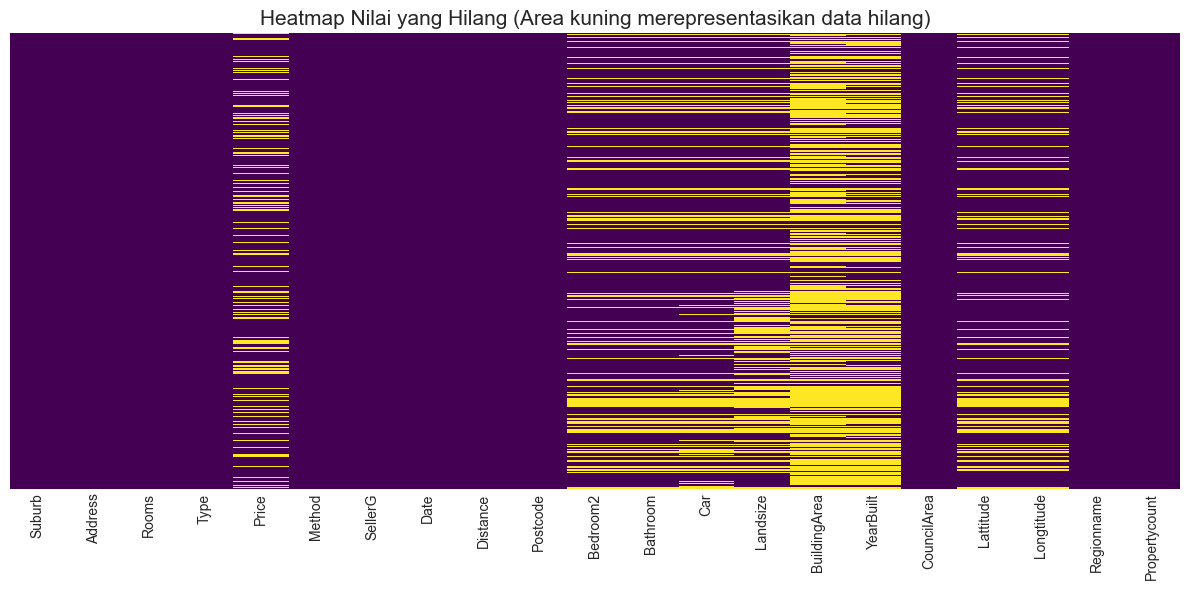

In [68]:
if df is not None:
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'Jumlah': missing_values, 'Persentase (%)': missing_percentage.round(2)})
    missing_df = missing_df[missing_df['Jumlah'] > 0].sort_values('Jumlah', ascending=False)

    print("Analisis Nilai yang Hilang (Kolom dengan data hilang):")
    display(missing_df)

    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Heatmap Nilai yang Hilang (Area kuning merepresentasikan data hilang)', fontsize=15)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame 'df' tidak dimuat. Melewati Analisis Nilai yang Hilang.")

### 2.3 Ringkasan Statistik untuk Fitur Numerik

In [69]:
if df is not None:
    print("Ringkasan Statistik untuk Kolom Numerik:")
    # Filter NUMERICAL_COLS yang ada di df
    valid_numerical_cols = [col for col in NUMERICAL_COLS if col in df.columns]
    if valid_numerical_cols:
        display(df[valid_numerical_cols].describe().T)
    else:
        print("Tidak ada kolom numerik yang valid ditemukan di DataFrame.")
else:
    print("DataFrame 'df' tidak dimuat. Melewati Ringkasan Statistik.")

Ringkasan Statistik untuk Kolom Numerik:


,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0000,3.0310,0.9699,1.0000,2.0000,3.0000,4.0000,16.0000
Distance,34856.0000,11.1849,6.7889,0.0000,6.4000,10.3000,14.0000,48.1000
Bedroom2,26640.0000,3.0846,0.9807,0.0000,2.0000,3.0000,4.0000,30.0000
Bathroom,26631.0000,1.6248,0.7242,0.0000,1.0000,2.0000,2.0000,12.0000
Car,26129.0000,1.7288,1.0108,0.0000,1.0000,2.0000,2.0000,26.0000
Landsize,23047.0000,593.5990,3398.8419,0.0000,224.0000,521.0000,670.0000,433014.0000
BuildingArea,13742.0000,160.2564,401.2671,0.0000,102.0000,136.0000,188.0000,44515.0000
YearBuilt,15551.0000,1965.2899,37.3282,1196.0000,1940.0000,1970.0000,2000.0000,2106.0000
Propertycount,34854.0000,7572.8883,4428.0903,83.0000,4385.0000,6763.0000,10412.0000,21650.0000


### 2.4 Analisis Numerik Detail

Pada tahap ini, kita akan melihat lebih dekat pada fitur-fitur numerik untuk memahami distribusi, tendensi sentral, penyebaran, dan potensi outlier. Fitur-fitur seperti 'Rooms', 'Distance', 'Landsize', 'BuildingArea', dan 'YearBuilt' sangat penting karena secara intuitif berhubungan dengan harga properti.

- **Distribusi:** Kita akan memeriksa apakah distribusi fitur numerik cenderung normal, miring (skewed) ke kiri atau kanan. Distribusi yang sangat miring mungkin memerlukan transformasi (misalnya, log-transform) untuk beberapa model, meskipun model linear cukup robust terhadap ini selama asumsi residual terpenuhi.
- **Tendensi Sentral:** Nilai rata-rata (mean) dan median akan memberikan gambaran tentang nilai tipikal untuk setiap fitur. Perbedaan besar antara mean dan median dapat mengindikasikan adanya outlier atau distribusi yang miring.
- **Penyebaran:** Standar deviasi, rentang interkuartil (IQR), serta nilai minimum dan maksimum akan menunjukkan seberapa bervariasi data untuk setiap fitur. Penyebaran yang sangat besar mungkin juga mengindikasikan outlier.
- **Outlier:** Nilai ekstrem yang jauh dari sebagian besar data dapat memengaruhi performa model secara signifikan, terutama model yang sensitif terhadap outlier seperti regresi linear. Kita akan mengidentifikasi potensi outlier melalui statistik deskriptif dan visualisasi (misalnya, boxplot) dan menanganinya di tahap pra-pemrosesan.

Untuk kolom 'Price' (TARGET_COL), analisis ini sangat krusial karena ini adalah variabel yang ingin kita prediksi. Distribusinya, adanya outlier, dan rentangnya akan sangat memengaruhi bagaimana kita membangun dan mengevaluasi model.

### 2.5 Distribusi Variabel Target (Price)

Distribusi Variabel Target (Price)


count      27247.0000
mean     1050173.3450
std       641467.1301
min        85000.0000
25%       635000.0000
50%       870000.0000
75%      1295000.0000
max     11200000.0000
Name: Price, dtype: float64


Rentang Harga: $85,000 hingga $11,200,000
Harga Rata-rata: $1,050,173
Harga Median: $870,000


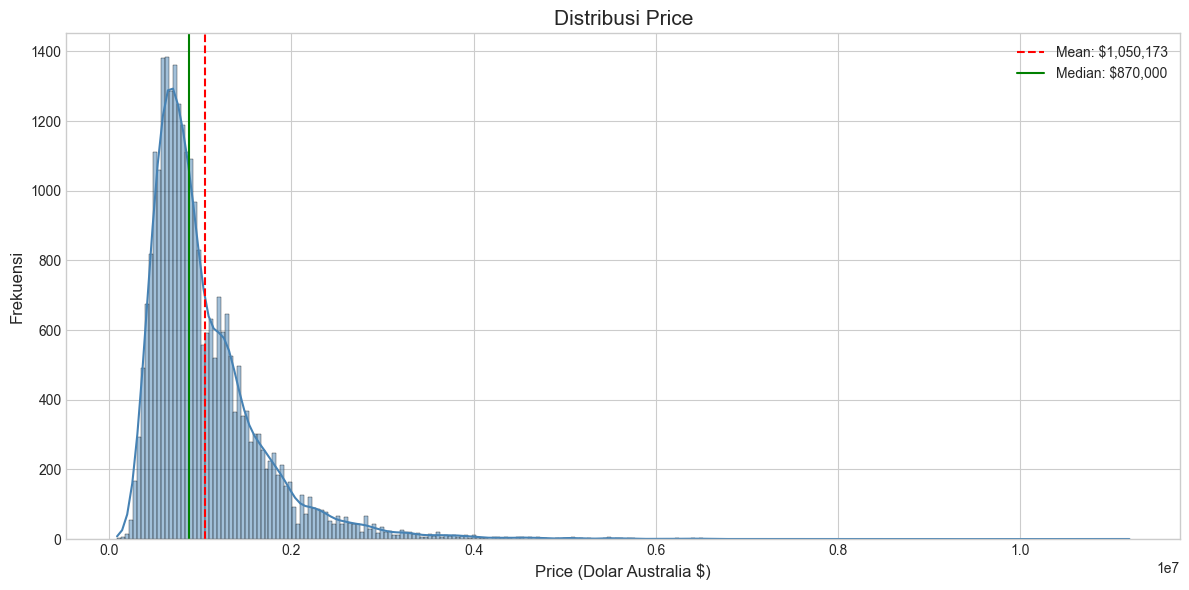

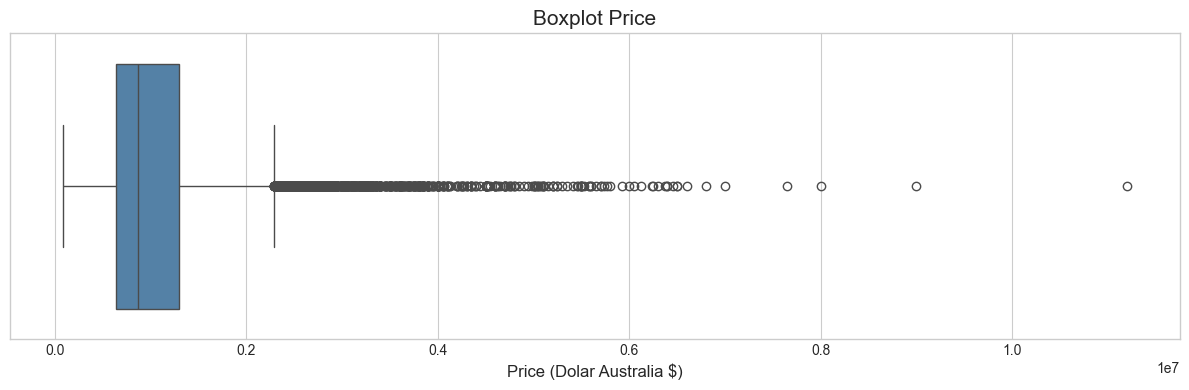

Distribusi harga cenderung miring ke kanan (right-skewed), yang umum terjadi pada data harga. Terdapat potensi outlier di sisi atas, yang akan ditangani pada tahap pra-pemrosesan.

In [70]:
if df is not None and TARGET_COL in df.columns:
    print(f"Distribusi Variabel Target ({TARGET_COL})")
    price_stats = df[TARGET_COL].describe()
    display(price_stats)
    print(f"\nRentang Harga: ${price_stats['min']:,.0f} hingga ${price_stats['max']:,.0f}")
    print(f"Harga Rata-rata: ${price_stats['mean']:,.0f}")
    print(f"Harga Median: ${price_stats['50%']:,.0f}")

    plt.figure(figsize=(12, 6))
    sns.histplot(df[TARGET_COL].dropna(), kde=True, color='steelblue')
    plt.title(f'Distribusi {TARGET_COL}', fontsize=15)
    plt.xlabel(f'{TARGET_COL} (Dolar Australia $)', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.axvline(df[TARGET_COL].mean(), color='red', linestyle='--', label=f'Mean: ${df[TARGET_COL].mean():,.0f}')
    plt.axvline(df[TARGET_COL].median(), color='green', linestyle='-', label=f'Median: ${df[TARGET_COL].median():,.0f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[TARGET_COL].dropna(), color='steelblue')
    plt.title(f'Boxplot {TARGET_COL}', fontsize=15)
    plt.xlabel(f'{TARGET_COL} (Dolar Australia $)', fontsize=12)
    plt.tight_layout()
    plt.show()
    display(Markdown("Distribusi harga cenderung miring ke kanan (right-skewed), yang umum terjadi pada data harga. Terdapat potensi outlier di sisi atas, yang akan ditangani pada tahap pra-pemrosesan."))
else:
    print(f"DataFrame 'df' tidak dimuat atau kolom '{TARGET_COL}' hilang. Melewati Distribusi Variabel Target.")

### 2.6 Analisis Variabel Kategorikal

Analisis Variabel Kategorikal (10 nilai unik teratas dan jumlahnya)

--- Type ---


,count
Type,
h,23980
u,7297
t,3580


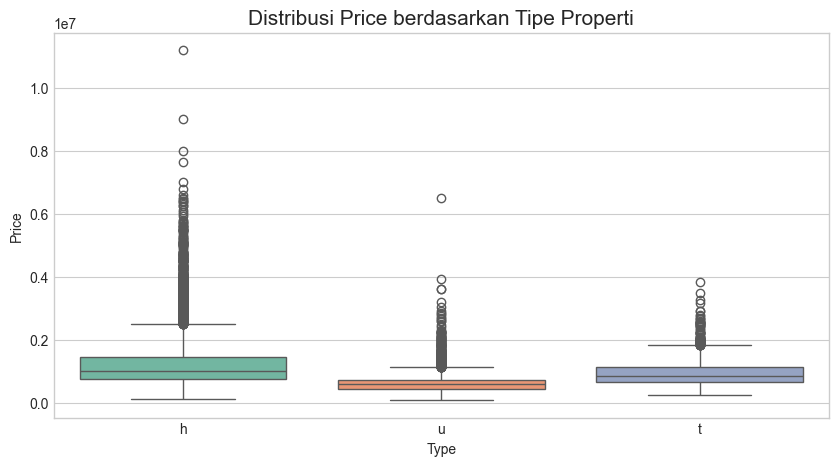


--- Method ---


,count
Method,
S,19744
SP,5095
PI,4850
VB,3108
SN,1317
PN,308
SA,226
W,173
SS,36



--- Regionname ---


,count
Regionname,
Southern Metropolitan,11836
Northern Metropolitan,9557
Western Metropolitan,6799
Eastern Metropolitan,4377
South-Eastern Metropolitan,1739
Eastern Victoria,228
Northern Victoria,203
Western Victoria,115



--- CouncilArea ---


,count
CouncilArea,
Boroondara City Council,3675
Darebin City Council,2851
Moreland City Council,2122
Glen Eira City Council,2006
Melbourne City Council,1952
Banyule City Council,1861
Moonee Valley City Council,1791
Bayside City Council,1764
Brimbank City Council,1593


In [71]:
if df is not None:
    print("Analisis Variabel Kategorikal (10 nilai unik teratas dan jumlahnya)")
    for col in CATEGORICAL_COLS:
        if col in df.columns:
            print(f"\n--- {col} ---")
            display(df[col].value_counts().head(10).to_frame())
            if col == 'Type' and TARGET_COL in df.columns:
                plt.figure(figsize=(10, 5))
                sns.boxplot(x='Type', y=TARGET_COL, data=df, palette='Set2')
                plt.title(f'Distribusi {TARGET_COL} berdasarkan Tipe Properti', fontsize=15)
                plt.show()
else:
    print("DataFrame 'df' tidak dimuat. Melewati Analisis Variabel Kategorikal.")

### 2.7 Matriks Korelasi (untuk Fitur Numerik)

Matriks korelasi menunjukkan hubungan linear antara pasangan fitur numerik. Nilai korelasi berkisar dari -1 hingga 1:
- **1:** Korelasi positif sempurna (ketika satu fitur meningkat, fitur lainnya juga meningkat).
- **-1:** Korelasi negatif sempurna (ketika satu fitur meningkat, fitur lainnya menurun).
- **0:** Tidak ada korelasi linear.

Kita terutama tertarik pada korelasi antara fitur-fitur independen dengan variabel target ('Price'). Fitur dengan korelasi (positif atau negatif) yang kuat terhadap 'Price' kemungkinan akan menjadi prediktor yang baik. Namun, korelasi tinggi antar fitur independen (multikolinearitas) dapat menjadi masalah bagi beberapa model regresi, meskipun pipeline Scikit-learn dengan regularisasi (tidak digunakan di sini secara eksplisit, tetapi bisa ditambahkan) dapat membantu menanganinya.

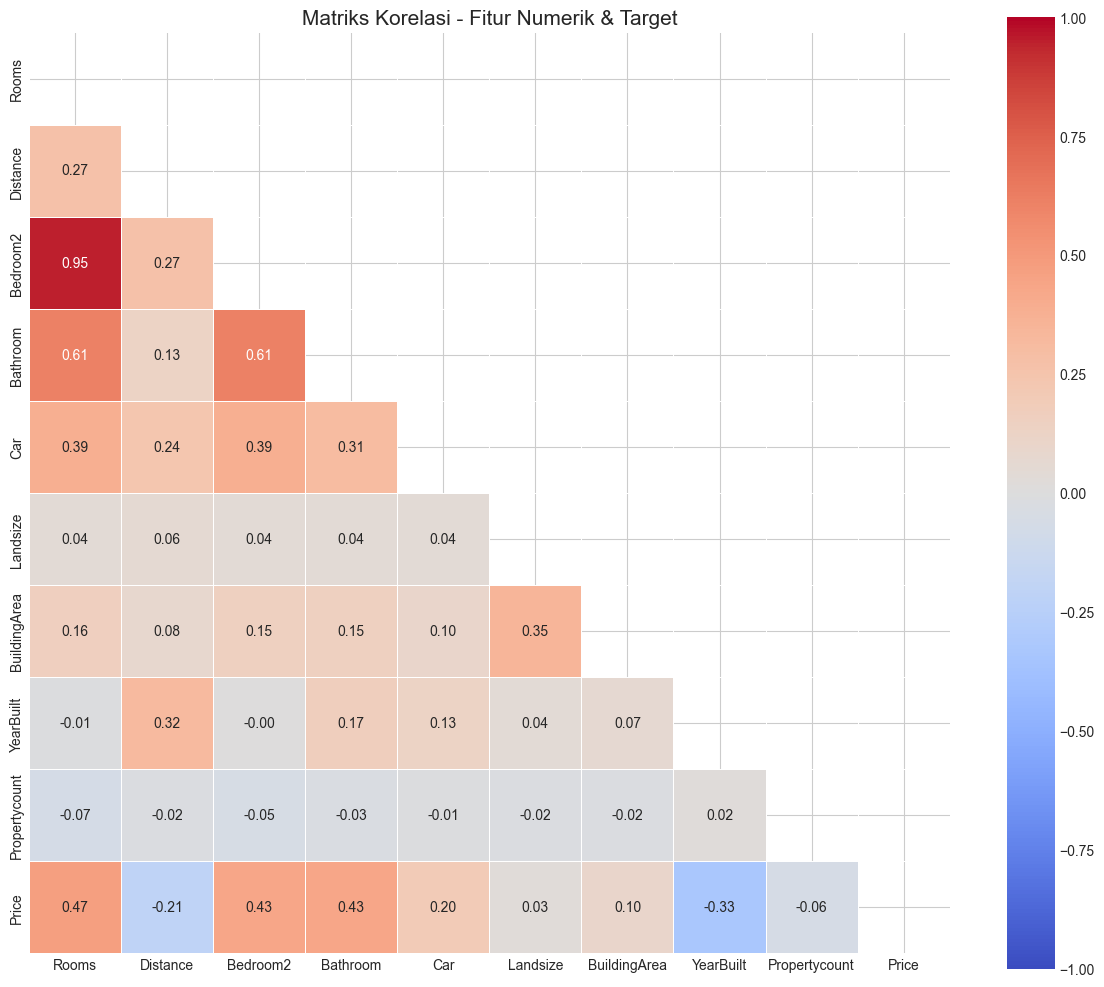

Fitur Teratas yang Berkorelasi dengan Price:


,Price
Price,1.0000
Rooms,0.4700
Bathroom,0.4300
Bedroom2,0.4300
Car,0.2000
BuildingArea,0.1000


Dari matriks korelasi, 'Rooms', 'Bedroom2', dan 'Bathroom' menunjukkan korelasi positif yang cukup baik dengan 'Price'. 'Distance' memiliki korelasi negatif, yang masuk akal (semakin jauh dari pusat, harga cenderung lebih rendah). 'YearBuilt' memiliki korelasi negatif kecil, mungkin menunjukkan rumah baru tidak selalu lebih mahal, atau faktor lain lebih dominan.

In [72]:
if df is not None:
    cols_for_corr = [col for col in NUMERICAL_COLS if col in df.columns]
    if TARGET_COL in df.columns:
        cols_for_corr.append(TARGET_COL)
    else:
        print(f"Kolom target '{TARGET_COL}' tidak ditemukan untuk analisis korelasi.")

    if cols_for_corr and len(cols_for_corr) > 1:
        correlation_matrix = df[cols_for_corr].corr().round(2)
        plt.figure(figsize=(12, 10))
        mask = np.zeros_like(correlation_matrix, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
        plt.title('Matriks Korelasi - Fitur Numerik & Target', fontsize=15)
        plt.tight_layout()
        plt.show()

        if TARGET_COL in correlation_matrix.columns:
            print(f"Fitur Teratas yang Berkorelasi dengan {TARGET_COL}:")
            price_corr = correlation_matrix[TARGET_COL].sort_values(ascending=False)
            display(price_corr.head(6).to_frame())
            display(Markdown("Dari matriks korelasi, 'Rooms', 'Bedroom2', dan 'Bathroom' menunjukkan korelasi positif yang cukup baik dengan 'Price'. 'Distance' memiliki korelasi negatif, yang masuk akal (semakin jauh dari pusat, harga cenderung lebih rendah). 'YearBuilt' memiliki korelasi negatif kecil, mungkin menunjukkan rumah baru tidak selalu lebih mahal, atau faktor lain lebih dominan."))
    else:
        print("Tidak cukup kolom numerik yang valid untuk matriks korelasi.")
else:
    print("DataFrame 'df' tidak dimuat. Melewati Matriks Korelasi.")

## Langkah 3: Pra-pemrosesan Data
Menangani nilai yang hilang, outlier, dan duplikat untuk meningkatkan kualitas data sebelum pelatihan model.

In [73]:
df_processed = None
if df is not None:
    print("Pra-pemrosesan Data")
    start_time = time.time()
    original_shape = df.shape
    df_processed = df.copy()

    print("Menangani nilai yang hilang...")
    for col in NUMERICAL_COLS:
        if col in df_processed.columns and df_processed[col].isnull().any():
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
            # print(f"   Nilai hilang di '{col}' (numerik) diisi dengan median.")

    for col in CATEGORICAL_COLS:
        if col in df_processed.columns and df_processed[col].isnull().any():
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
            # print(f"   Nilai hilang di '{col}' (kategorikal) diisi dengan modus.")
    print("Pengisian nilai hilang selesai.")

    if TARGET_COL in df_processed.columns:
        initial_count = len(df_processed)
        df_processed.dropna(subset=[TARGET_COL], inplace=True)
        print(f"Menghapus {initial_count - len(df_processed)} baris dengan nilai {TARGET_COL} yang hilang.")

    if TARGET_COL in df_processed.columns and not df_processed.empty:
        print(f"Menangani outlier pada {TARGET_COL} menggunakan metode IQR...")
        Q1 = df_processed[TARGET_COL].quantile(0.25)
        Q3 = df_processed[TARGET_COL].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        initial_count = len(df_processed)
        df_processed = df_processed[(df_processed[TARGET_COL] >= lower_bound) & (df_processed[TARGET_COL] <= upper_bound)]
        print(f"   Menghapus {initial_count - len(df_processed)} baris outlier berdasarkan {TARGET_COL}.")
        if not df_processed.empty:
            print(f"   Rentang {TARGET_COL} setelah penghapusan outlier: ${df_processed[TARGET_COL].min():,.0f} - ${df_processed[TARGET_COL].max():,.0f}")
        else:
            print(f"   Semua baris terhapus setelah penanganan outlier {TARGET_COL}. Periksa data.")

    if not df_processed.empty:
        initial_count = len(df_processed)
        df_processed.drop_duplicates(inplace=True)
        print(f"Menghapus {initial_count - len(df_processed)} baris duplikat.")

    print(f"\nPra-pemrosesan data selesai dalam {time.time() - start_time:.2f} detik.")
    print(f"   Shape asli: {original_shape}, Shape baru: {df_processed.shape if df_processed is not None else (0,0)}")
    if df_processed is not None:
      print(f"   Total baris yang dihapus: {original_shape[0] - df_processed.shape[0]}")

    if df_processed is not None and df_processed.empty:
        print("DataFrame kosong setelah pra-pemrosesan. Menghentikan langkah selanjutnya.")
        df_processed = None
else:
    print("DataFrame 'df' asli tidak tersedia. Melewati Pra-pemrosesan.")

Pra-pemrosesan Data
Menangani nilai yang hilang...
Pengisian nilai hilang selesai.
Menghapus 7610 baris dengan nilai Price yang hilang.
Menangani outlier pada Price menggunakan metode IQR...
   Menghapus 1278 baris outlier berdasarkan Price.
   Rentang Price setelah penghapusan outlier: $85,000 - $2,285,000
Menghapus 0 baris duplikat.

Pra-pemrosesan data selesai dalam 0.07 detik.
   Shape asli: (34857, 21), Shape baru: (25969, 21)
   Total baris yang dihapus: 8888


## Langkah 4: Pembagian Data (Train-Test Split)
Membagi data yang telah diproses menjadi set pelatihan (untuk melatih model) dan set pengujian (untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya).

In [74]:
X_train, X_test, y_train, y_test = None, None, None, None
actual_numerical_cols_used = []
actual_categorical_cols_used = []

if df_processed is not None and not df_processed.empty:
    print("Pembagian Data")

    current_numerical_cols = [col for col in NUMERICAL_COLS if col in df_processed.columns]
    current_categorical_cols = [col for col in CATEGORICAL_COLS if col in df_processed.columns]

    feature_columns = current_numerical_cols + current_categorical_cols

    if not feature_columns:
        print("Tidak ada kolom fitur yang tersedia setelah pemfilteran. Periksa definisi kolom dan langkah pra-pemrosesan.")
    elif TARGET_COL not in df_processed.columns:
        print(f"Kolom target '{TARGET_COL}' tidak ditemukan dalam data yang diproses.")
    else:
        X = df_processed[feature_columns]
        y = df_processed[TARGET_COL]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        actual_numerical_cols_used = [col for col in current_numerical_cols if col in X_train.columns]
        actual_categorical_cols_used = [col for col in current_categorical_cols if col in X_train.columns]

        print(f"Data berhasil dibagi.")
        print(f"   Set Pelatihan: X_train shape {X_train.shape}, y_train shape {y_train.shape}")
        print(f"   Set Pengujian:  X_test shape {X_test.shape}, y_test shape {y_test.shape}")
        print(f"   Kolom numerik untuk pelatihan: {actual_numerical_cols_used}")
        print(f"   Kolom kategorikal untuk pelatihan: {actual_categorical_cols_used}")
else:
    print("DataFrame 'df_processed' tidak tersedia atau kosong. Melewati Pembagian Data.")

Pembagian Data
Data berhasil dibagi.
   Set Pelatihan: X_train shape (20775, 13), y_train shape (20775,)
   Set Pengujian:  X_test shape (5194, 13), y_test shape (5194,)
   Kolom numerik untuk pelatihan: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']
   Kolom kategorikal untuk pelatihan: ['Type', 'Method', 'Regionname', 'CouncilArea']


## Langkah 5: Penjelasan Model, Pembangunan, dan Pelatihan
Pada bagian ini, kita akan membahas model regresi yang akan digunakan, yaitu Regresi Linear dan Regresi Polinomial, termasuk dasar matematika dan cara kerjanya, diikuti dengan proses pembangunan dan pelatihan model.

### 5.1 Penjelasan Regresi Linear

**Konsep Dasar:**
Regresi Linear adalah salah satu algoritma supervised learning yang paling sederhana dan paling banyak digunakan untuk memprediksi nilai kontinu (numerik). Tujuannya adalah untuk menemukan hubungan linear terbaik antara variabel independen (fitur, $X$) dan variabel dependen (target, $y$). Model ini mengasumsikan bahwa ada hubungan linear antara fitur dan target.

**Representasi Model (Persamaan Matematika):**
Jika kita memiliki $n$ fitur ($x_1, x_2, ..., x_n$), prediksi ($ \hat{y} $) dari model regresi linear dapat direpresentasikan sebagai:

$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n $$

Di mana:
- $ \hat{y} $ adalah nilai target yang diprediksi.
- $ \beta_0 $ adalah intersep (bias), yaitu nilai prediksi ketika semua fitur $x_i$ adalah nol.
- $ \beta_1, \beta_2, \dots, \beta_n $ adalah koefisien (bobot) untuk masing-masing fitur $x_1, x_2, \dots, x_n$. Koefisien ini merepresentasikan perubahan rata-rata pada $ \hat{y} $ untuk setiap satu unit perubahan pada fitur $x_i$, dengan asumsi fitur lain konstan.
- $ x_1, x_2, \dots, x_n $ adalah nilai dari fitur-fitur independen.

Dalam bentuk vektor, jika $X$ adalah matriks fitur (dengan kolom pertama adalah 1 untuk intersep) dan $ \beta $ adalah vektor koefisien, maka $ \hat{y} = X \beta $.

**Cara Kerja (Estimasi Koefisien):**
Tujuan utama selama pelatihan model regresi linear adalah untuk menemukan nilai koefisien $ \beta $ yang paling optimal. Metode yang paling umum digunakan untuk ini adalah **Ordinary Least Squares (OLS)**.

OLS bertujuan untuk meminimalkan jumlah dari kuadrat selisih antara nilai target aktual ($y_i$) dan nilai target yang diprediksi oleh model ($ \hat{y}_i $) untuk semua sampel data. Fungsi biaya (cost function) yang diminimalkan, sering disebut Sum of Squared Errors (SSE) atau Residual Sum of Squares (RSS), adalah:

$$ SSE = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_{i1} + \dots + \beta_n x_{in}))^2 $$

Di mana $m$ adalah jumlah sampel data.

Untuk menemukan nilai $ \beta $ yang meminimalkan SSE, kita dapat menggunakan kalkulus (mengambil turunan parsial SSE terhadap setiap $ \beta_j $ dan menyamakannya dengan nol) atau aljabar linear. Solusi analitik untuk $ \beta $ dalam OLS (jika $(X^T X)$ invertible) adalah:

$$ \hat{\beta} = (X^T X)^{-1} X^T y $$

Alternatif lain untuk dataset yang sangat besar di mana menghitung invers matriks menjadi mahal adalah menggunakan metode iteratif seperti **Gradient Descent**.

### 5.2 Penjelasan Regresi Polinomial

**Konsep Dasar:**
Regresi Polinomial adalah bentuk khusus dari regresi linear di mana hubungan antara variabel independen $x$ dan variabel dependen $y$ dimodelkan sebagai polinomial derajat $d$ dalam $x$. Meskipun model ini menangkap hubungan non-linear, secara matematis ini masih merupakan jenis regresi linear karena bersifat linear dalam hal koefisien $ \beta $.

**Representasi Model (Persamaan Matematika):**
Untuk satu fitur $x$, model regresi polinomial derajat $d$ adalah:

$$ \hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_d x^d $$

Kita dapat melihat ini sebagai model regresi linear dengan fitur-fitur baru: $x_1 = x, x_2 = x^2, \dots, x_d = x^d$. Dengan transformasi ini, kita dapat menggunakan metode OLS yang sama seperti pada regresi linear untuk mengestimasi koefisien $ \beta_0, \beta_1, \dots, \beta_d $.

Jika kita memiliki beberapa fitur, misalnya $x_1$ dan $x_2$, dan kita ingin model polinomial derajat 2, kita akan membuat fitur-fitur baru seperti $x_1, x_2, x_1^2, x_2^2, x_1 x_2$ (fitur interaksi). Scikit-learn `PolynomialFeatures` akan menangani pembuatan fitur-fitur ini.

**Cara Kerja:**
1.  **Transformasi Fitur:** Langkah pertama adalah mengubah fitur asli menjadi fitur polinomial hingga derajat yang ditentukan. Misalnya, jika kita memiliki fitur 'Rooms' dan kita memilih derajat 2, fitur baru yang dihasilkan adalah 'Rooms' (derajat 1) dan 'Rooms^2' (derajat 2).
    Scikit-learn `PolynomialFeatures(degree=d, include_bias=False)` digunakan untuk ini. `include_bias=False` berarti tidak menambahkan kolom fitur yang semuanya 1, karena ini biasanya ditangani oleh model `LinearRegression` itu sendiri (jika `fit_intercept=True`).
2.  **Pelatihan Model Linear:** Setelah fitur-fitur polinomial dibuat, model regresi linear standar dilatih menggunakan fitur-fitur baru ini.

**Pemilihan Derajat Polinomial ($d$):**
Memilih derajat $d$ yang tepat sangat penting:
-   Jika $d$ terlalu rendah, model mungkin *underfit* (tidak cukup menangkap kompleksitas data).
-   Jika $d$ terlalu tinggi, model mungkin *overfit* (terlalu sensitif terhadap noise dalam data pelatihan dan tidak generalisasi dengan baik ke data baru). Overfitting sering ditandai dengan performa yang sangat baik pada data pelatihan tetapi buruk pada data pengujian.
Validasi silang (cross-validation) sering digunakan untuk memilih derajat $d$ yang optimal.

### 5.3 Definisi Preprocessor
Preprocessor bertanggung jawab untuk mengubah fitur mentah menjadi format yang sesuai untuk model. Ini melibatkan:
- **Imputasi:** Mengisi nilai yang hilang. Untuk fitur numerik, kita menggunakan median. Untuk fitur kategorikal, kita menggunakan modus (nilai yang paling sering muncul).
- **Scaling (Fitur Numerik):** `StandardScaler` mengubah fitur numerik sehingga memiliki mean 0 dan standar deviasi 1. Ini penting untuk model seperti regresi (terutama dengan regularisasi) dan algoritma berbasis jarak, karena memastikan semua fitur memiliki skala yang sama dan berkontribusi secara seimbang.
- **Encoding (Fitur Kategorikal):** `OneHotEncoder` mengubah fitur kategorikal menjadi representasi numerik. Setiap kategori unik dalam fitur asli menjadi kolom biner baru (0 atau 1). `handle_unknown='ignore'` berarti jika kategori baru muncul di data pengujian yang tidak ada di data pelatihan, kolom yang sesuai akan berisi semua nol.

In [75]:
preprocessor = None
if X_train is not None:
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, actual_numerical_cols_used),
            ('cat', categorical_transformer, actual_categorical_cols_used)
        ])
    print("Preprocessor telah didefinisikan.")
    print(f"   Diterapkan pada {len(actual_numerical_cols_used)} kolom numerik dan {len(actual_categorical_cols_used)} kolom kategorikal.")
else:
    print("X_train tidak tersedia. Melewati definisi Preprocessor.")

Preprocessor telah didefinisikan.
   Diterapkan pada 9 kolom numerik dan 4 kolom kategorikal.


### 5.4 Proses Pelatihan Model
Proses pelatihan melibatkan penggunaan data pelatihan (`X_train`, `y_train`) untuk mengestimasi parameter model (koefisien $ \beta $).

**Untuk Regresi Linear:**
Ketika `lr_pipeline.fit(X_train, y_train)` dipanggil:
1.  `preprocessor` pertama-tama diterapkan pada `X_train`:
    -   Nilai yang hilang pada fitur numerik diimputasi dengan median dari `X_train`.
    -   Fitur numerik kemudian diskalakan (mean=0, std=1) berdasarkan statistik dari `X_train`.
    -   Nilai yang hilang pada fitur kategorikal diimputasi dengan modus dari `X_train`.
    -   Fitur kategorikal diubah menjadi representasi one-hot berdasarkan kategori unik yang ada di `X_train`.
2.  `LinearRegression()` kemudian dilatih pada `X_train` yang telah diproses dan `y_train`.
    -   Model menghitung koefisien $ \beta $ menggunakan metode Ordinary Least Squares (OLS) untuk meminimalkan Sum of Squared Errors (SSE) antara prediksi model dan nilai `y_train` yang sebenarnya.

**Untuk Regresi Polinomial:**
Ketika `poly2_pipeline.fit(X_train, y_train)` dipanggil:
1.  `preprocessor` diterapkan pada `X_train` (sama seperti di atas).
2.  `PolynomialFeatures(degree=2)` kemudian diterapkan pada output dari `preprocessor`:
    -   Fitur-fitur baru dibuat dengan menaikkan pangkat fitur-fitur yang ada hingga derajat 2, dan juga membuat fitur interaksi antar fitur asli (misalnya, $x_1 x_2$, $x_1 x_3^2$, dll., tergantung pada fitur input ke langkah ini).
3.  `LinearRegression()` dilatih pada fitur-fitur polinomial yang telah dihasilkan dan `y_train`.
    -   Proses OLS yang sama digunakan untuk menemukan koefisien $ \beta $ untuk model linear yang bekerja pada ruang fitur yang telah diperluas ini.

In [76]:
models = {}

if X_train is not None and y_train is not None and preprocessor is not None:
    print("Pelatihan Model")
    # 1. Model Regresi Linear
    print("Melatih Model Regresi Linear...")
    start_time = time.time()
    lr_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    lr_pipeline.fit(X_train, y_train)
    models['Linear Regression'] = lr_pipeline
    print(f"   Selesai dalam {time.time() - start_time:.2f} detik.")

    # 2. Model Regresi Polinomial (derajat 2)
    print("Melatih Model Regresi Polinomial (derajat=2)...")
    start_time = time.time()
    poly2_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regressor', LinearRegression())
    ])
    poly2_pipeline.fit(X_train, y_train)
    models['Polynomial Regression (degree=2)'] = poly2_pipeline
    print(f"   Selesai dalam {time.time() - start_time:.2f} detik.")

    print("\nSemua model berhasil dilatih.")
else:
    print("Data pelatihan atau preprocessor tidak tersedia. Melewati Pelatihan Model.")

Pelatihan Model
Melatih Model Regresi Linear...
   Selesai dalam 0.11 detik.
Melatih Model Regresi Polinomial (derajat=2)...
   Selesai dalam 18.60 detik.

Semua model berhasil dilatih.


## Langkah 6: Evaluasi Model
Mengevaluasi performa model terlatih pada data uji (`X_test`, `y_test`).

**METRIK EVALUASI MODEL REGRESI**

---

### **1. R-squared (R²)**  
*(Koefisien Determinasi)*  
Mengukur proporsi varians dalam variabel target yang dapat diprediksi oleh fitur:  
- **Range**: $-\infty$ hingga $1$  
- $R^2 = 0$: Model setara dengan prediksi rata-rata  
- $R^2 < 0$: Model lebih buruk dari prediksi rata-rata  

**Rumus:**  
$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

dengan:  
$$
\begin{aligned}
SS_{\text{res}} &= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \quad \text{(Sum of Squared Residuals)} \\
SS_{\text{tot}} &= \sum_{i=1}^{n} (y_i - \bar{y})^2 \quad \text{(Total Sum of Squares)}
\end{aligned}
$$  
$\bar{y}$: mean dari target $y$

---

### **2. MSE (Mean Squared Error)**  
Rata-rata kuadrat error (peka outlier):  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### **3. RMSE (Root Mean Squared Error)**  
Akar kuadrat MSE (satuan = target):  
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

---

### **4. MAE (Mean Absolute Error)**  
Rata-rata error absolut (robust terhadap outlier):  
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [77]:
model_metrics = {}
results_list = []

if models and X_test is not None and y_test is not None:
    print("Model Evaluation")
    print("-" * 60)
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        start_time = time.time()
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        model_metrics[model_name] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}
        results_list.append({'Model': model_name, 'R-squared': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae})

        print(f"   R-squared (R²): {r2:.4f}")
        print(f"   Mean Squared Error (MSE): {mse:.4f}")
        print(f"   Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"   Mean Absolute Error (MAE): {mae:.4f}")
        print(f"   Evaluation completed in {time.time() - start_time:.2f} seconds.")
        print("-" * 40)

    # Create DataFrame with formatted metrics for display
    results_df = pd.DataFrame(results_list).set_index('Model')
    
    # Format the DataFrame for better presentation
    pd.set_option('display.precision', 4)
    pd.set_option('display.float_format', lambda x: f'{x:.4f}')
    
    print("\nModel Performance Summary")
    print("=" * 60)
    display(results_df)

    if not results_df.empty:
        # Find best model based on R-squared
        best_model_name = results_df['R-squared'].idxmax()
        
        # Calculate improvement percentage over the next best model
        if len(results_df) > 1:
            best_r2 = results_df.loc[best_model_name, 'R-squared']
            other_models = results_df.index != best_model_name
            next_best_r2 = results_df.loc[other_models, 'R-squared'].max()
            improvement = ((best_r2 - next_best_r2) / next_best_r2) * 100
            
            print(f"\nBest Performing Model (based on R-squared): {best_model_name}")
            print(f"Improvement over next best model: {improvement:.2f}%")
        else:
            print(f"\nBest Performing Model: {best_model_name}")
            
        display(results_df.loc[[best_model_name]])
        
        # Print an interpretation of the results
        best_rmse = results_df.loc[best_model_name, 'RMSE']
        best_r2 = results_df.loc[best_model_name, 'R-squared']
        print(f"\nModel Interpretation:")
        print(f"- The model explains {best_r2*100:.2f}% of the variance in house prices")
        print(f"- The average prediction error (RMSE) is {best_rmse:.4f}")
else:
    print("Models or test data not available. Skipping Model Evaluation.")

Model Evaluation
------------------------------------------------------------
Evaluating Linear Regression...
   R-squared (R²): 0.6628
   Mean Squared Error (MSE): 62014687983.0488
   Root Mean Squared Error (RMSE): 249027.4844
   Mean Absolute Error (MAE): 188699.4949
   Evaluation completed in 0.02 seconds.
----------------------------------------
Evaluating Polynomial Regression (degree=2)...
   R-squared (R²): 0.7199
   Mean Squared Error (MSE): 51513602234.2780
   Root Mean Squared Error (RMSE): 226966.0817
   Mean Absolute Error (MAE): 156562.0153
   Evaluation completed in 0.08 seconds.
----------------------------------------

Model Performance Summary


,R-squared,MSE,RMSE,MAE
Model,,,,
Linear Regression,0.6628,62014687983.0488,249027.4844,188699.4949
Polynomial Regression (degree=2),0.7199,51513602234.2780,226966.0817,156562.0153



Best Performing Model (based on R-squared): Polynomial Regression (degree=2)
Improvement over next best model: 8.62%


,R-squared,MSE,RMSE,MAE
Model,,,,
Polynomial Regression (degree=2),0.7199,51513602234.2780,226966.0817,156562.0153



Model Interpretation:
- The model explains 71.99% of the variance in house prices
- The average prediction error (RMSE) is 226966.0817


## Langkah 7: Visualisasi Hasil
Memvisualisasikan metrik performa model dan plot diagnostik untuk pemahaman yang lebih baik.

Visualisasi Hasil


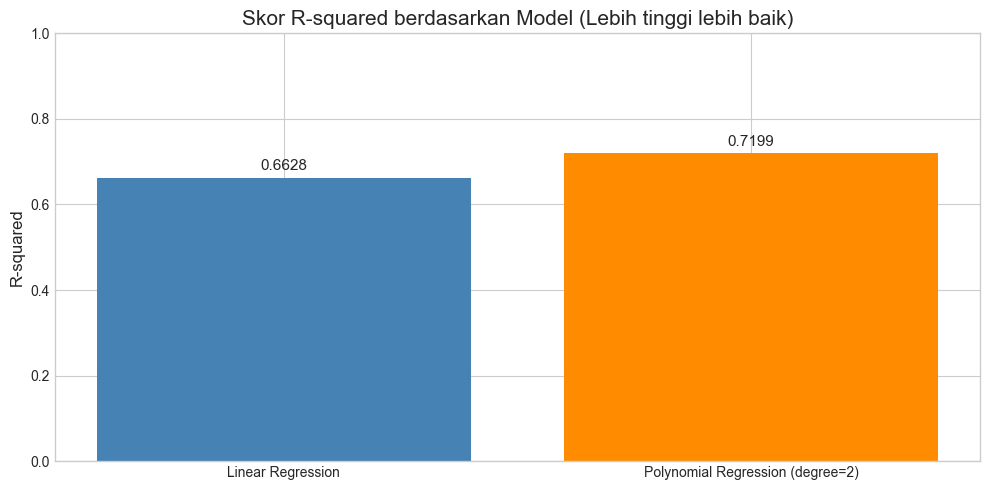

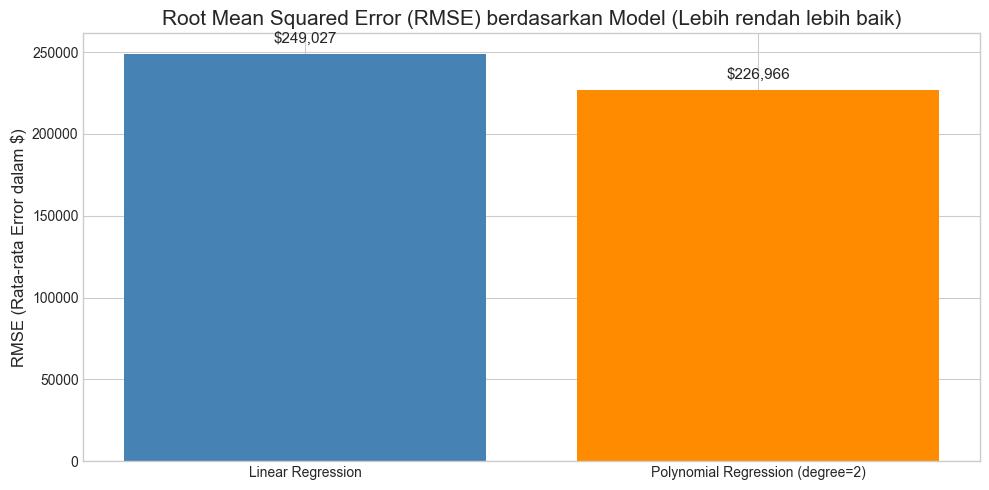

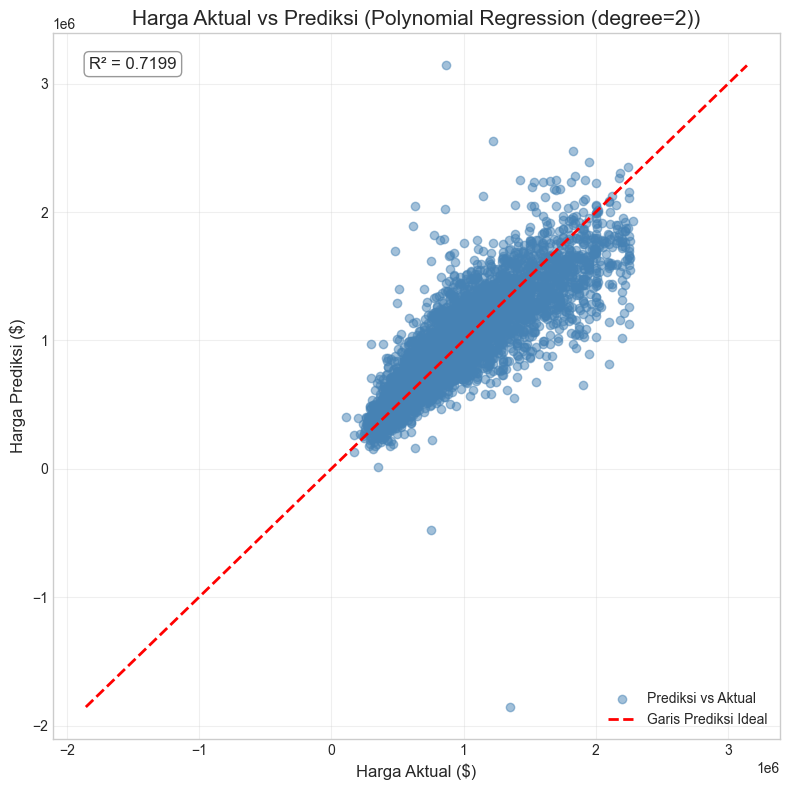

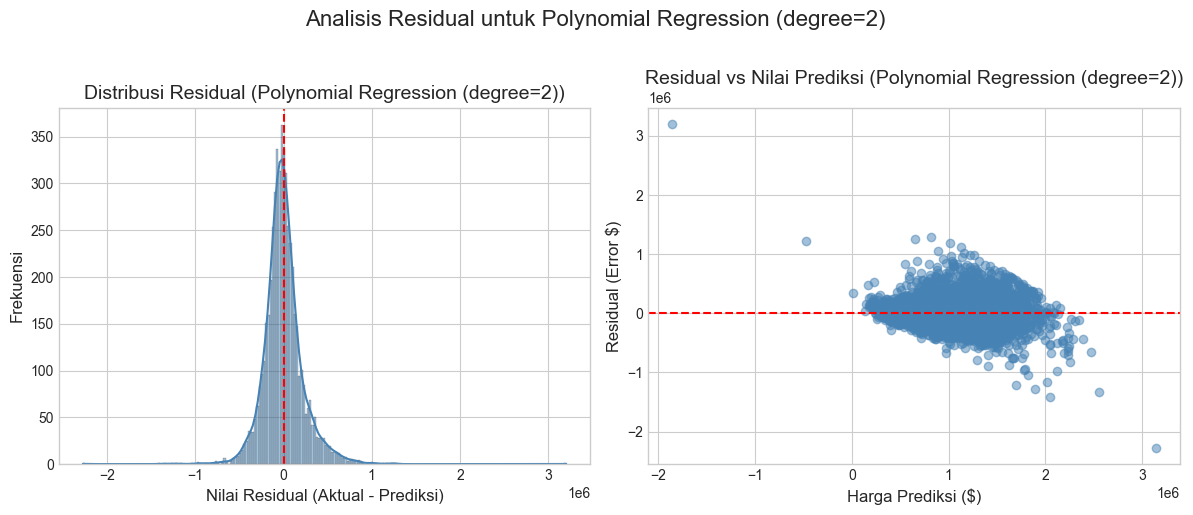

Plot residual membantu memeriksa asumsi model regresi. Idealnya, residual terdistribusi normal di sekitar nol dan tidak menunjukkan pola tertentu ketika diplot terhadap nilai prediksi (homoskedastisitas).

Visualisasi selesai.


In [78]:
if model_metrics and X_test is not None and y_test is not None and models:
    print("Visualisasi Hasil")

    r2_scores_dict = {name: metrics['R-squared'] for name, metrics in model_metrics.items()}
    model_names_list = list(r2_scores_dict.keys())
    r2_values_list = list(r2_scores_dict.values())

    plt.figure(figsize=(10, 5))
    bars = plt.bar(model_names_list, r2_values_list, color=['steelblue', 'darkorange'])
    plt.title('Skor R-squared berdasarkan Model (Lebih tinggi lebih baik)', fontsize=15)
    plt.ylabel('R-squared', fontsize=12)
    plt.ylim(min(0, min(r2_values_list)-0.1 if r2_values_list else 0), max(1, max(r2_values_list) * 1.1 if r2_values_list else 1))
    for bar in bars: plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01, f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=11)
    plt.tight_layout(); plt.show()

    rmse_scores_dict = {name: metrics['RMSE'] for name, metrics in model_metrics.items()}
    rmse_values_list = list(rmse_scores_dict.values())

    plt.figure(figsize=(10, 5))
    bars = plt.bar(model_names_list, rmse_values_list, color=['steelblue', 'darkorange'])
    plt.title('Root Mean Squared Error (RMSE) berdasarkan Model (Lebih rendah lebih baik)', fontsize=15)
    plt.ylabel('RMSE (Rata-rata Error dalam $)', fontsize=12)
    for bar in bars: plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + (max(rmse_values_list)*0.02 if rmse_values_list else 500), f'${bar.get_height():,.0f}', ha='center', va='bottom', fontsize=11)
    plt.tight_layout(); plt.show()

    if results_df is not None and not results_df.empty:
        best_model_name_viz = results_df['R-squared'].idxmax()
        best_model_viz = models[best_model_name_viz]
        y_pred_viz = best_model_viz.predict(X_test)

        plt.figure(figsize=(8, 8))
        plt.scatter(y_test, y_pred_viz, alpha=0.5, color='steelblue', label='Prediksi vs Aktual')
        min_val = min(y_test.min(), y_pred_viz.min())
        max_val = max(y_test.max(), y_pred_viz.max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Garis Prediksi Ideal')
        plt.title(f'Harga Aktual vs Prediksi ({best_model_name_viz})', fontsize=15)
        plt.xlabel('Harga Aktual ($)', fontsize=12)
        plt.ylabel('Harga Prediksi ($)', fontsize=12)
        plt.grid(True, alpha=0.3)
        r2_val_viz = model_metrics[best_model_name_viz]['R-squared']
        plt.annotate(f'R² = {r2_val_viz:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        plt.legend()
        plt.tight_layout(); plt.show()

        residuals_viz = y_test - y_pred_viz
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(residuals_viz, kde=True, color='steelblue', ax=axes[0])
        axes[0].axvline(0, color='r', linestyle='--')
        axes[0].set_title(f'Distribusi Residual ({best_model_name_viz})', fontsize=14)
        axes[0].set_xlabel('Nilai Residual (Aktual - Prediksi)', fontsize=12)
        axes[0].set_ylabel('Frekuensi', fontsize=12)

        axes[1].scatter(y_pred_viz, residuals_viz, alpha=0.5, color='steelblue')
        axes[1].axhline(y=0, color='r', linestyle='--')
        axes[1].set_title(f'Residual vs Nilai Prediksi ({best_model_name_viz})', fontsize=14)
        axes[1].set_xlabel('Harga Prediksi ($)', fontsize=12)
        axes[1].set_ylabel('Residual (Error $)', fontsize=12)
        plt.suptitle(f'Analisis Residual untuk {best_model_name_viz}', fontsize=16, y=1.02)
        plt.tight_layout(); plt.show()
        display(Markdown("Plot residual membantu memeriksa asumsi model regresi. Idealnya, residual terdistribusi normal di sekitar nol dan tidak menunjukkan pola tertentu ketika diplot terhadap nilai prediksi (homoskedastisitas)."))
    print("Visualisasi selesai.")
else:
    print("Metrik model atau data uji tidak tersedia. Melewati Visualisasi Hasil.")

Visualisasi Perbandingan Prediksi Model

1. Perbandingan Harga Aktual vs Prediksi Model (30 Sampel Data Uji)


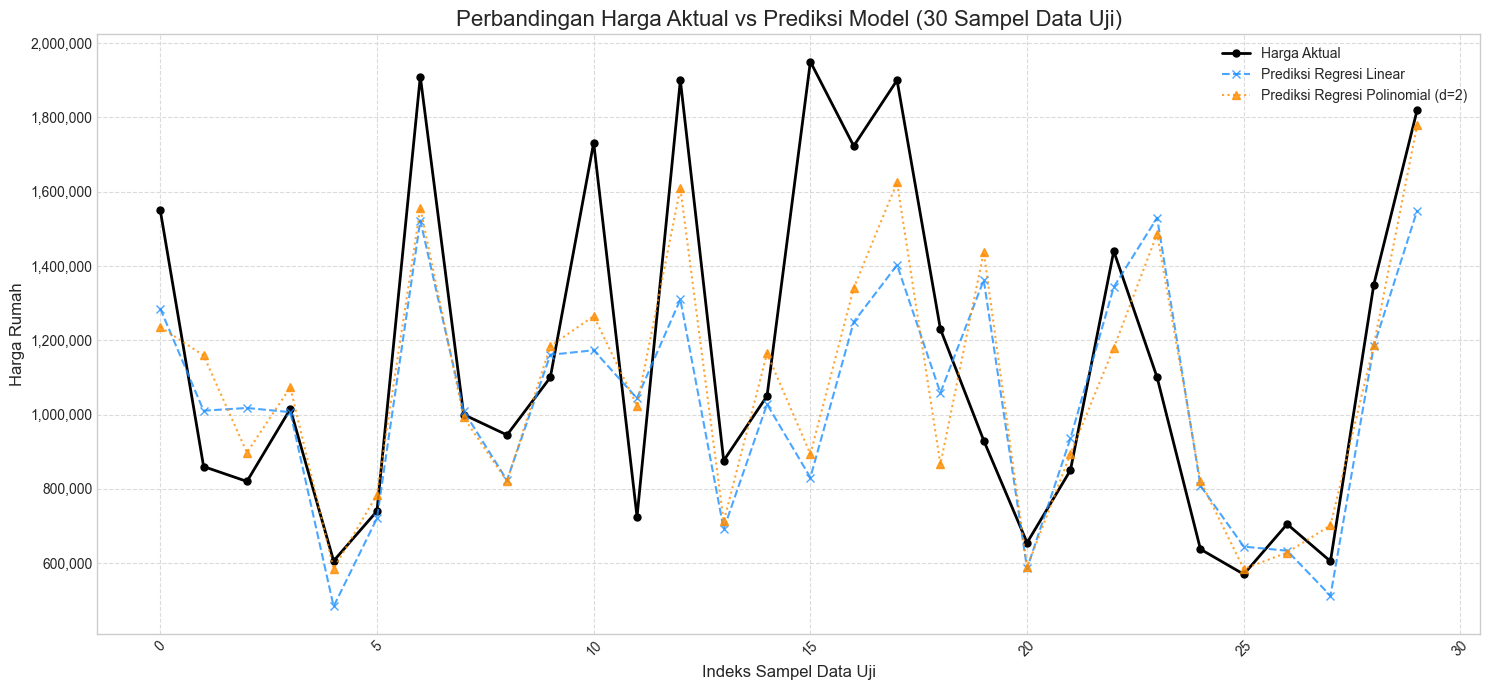

Plot di atas menunjukkan perbandingan antara harga aktual dengan prediksi dari kedua model untuk 30 sampel pertama dari data uji. Ini membantu secara visual melihat seberapa dekat prediksi masing-masing model dengan nilai sebenarnya.


Contoh data perbandingan (5 baris pertama dari sampel, harga diformat):


,Actual,Linear Regression,Polynomial Regression (degree=2)
0,"1,550,000","1,285,220","1,235,794"
1,"860,000","1,010,360","1,159,084"
2,"820,000","1,017,667","897,619"
3,"1,015,000","1,006,487","1,073,227"
4,"606,000","483,483","584,696"



2. Scatter Plot: Harga Aktual vs Prediksi (Seluruh Data Uji)


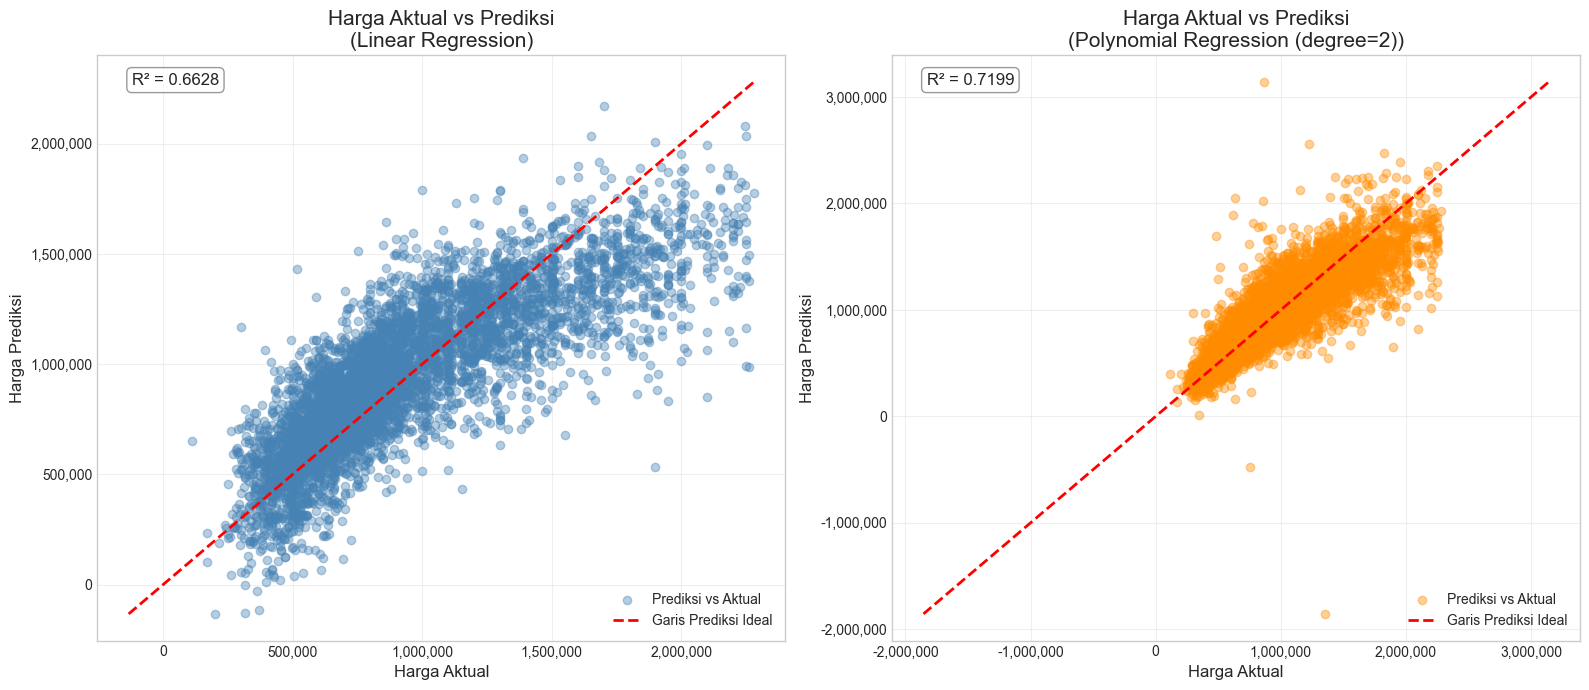

Scatter plot di atas membandingkan harga aktual dengan harga prediksi untuk seluruh data uji. Titik-titik yang lebih dekat ke garis diagonal merah menunjukkan prediksi yang lebih akurat. R² menunjukkan seberapa baik model menjelaskan variabilitas harga.


3. Analisis Residual Model (Seluruh Data Uji)


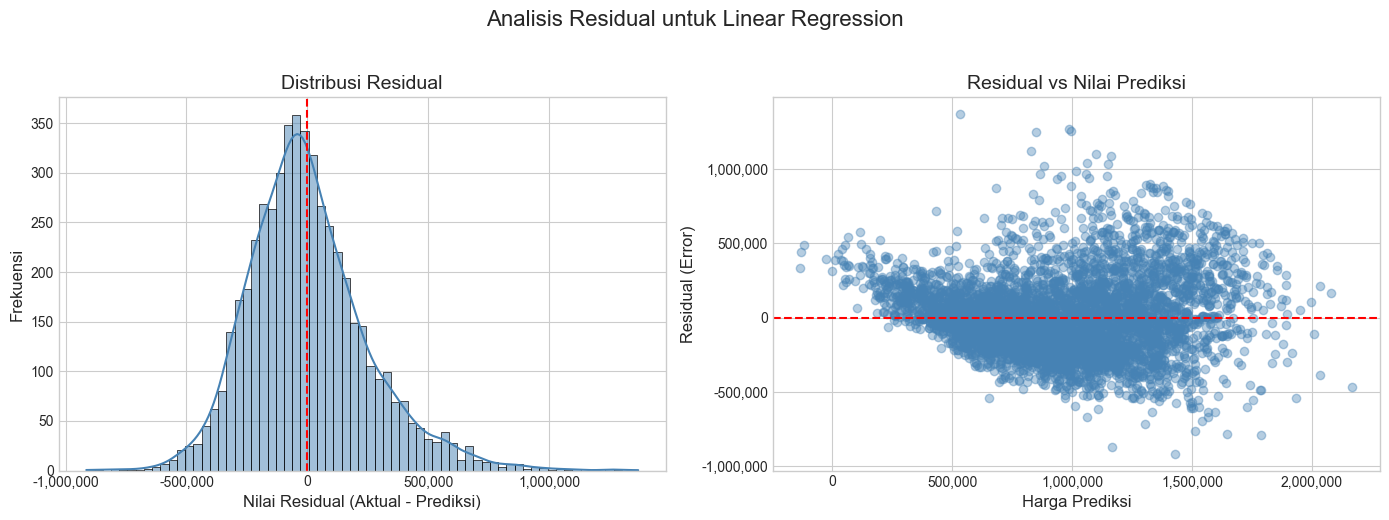

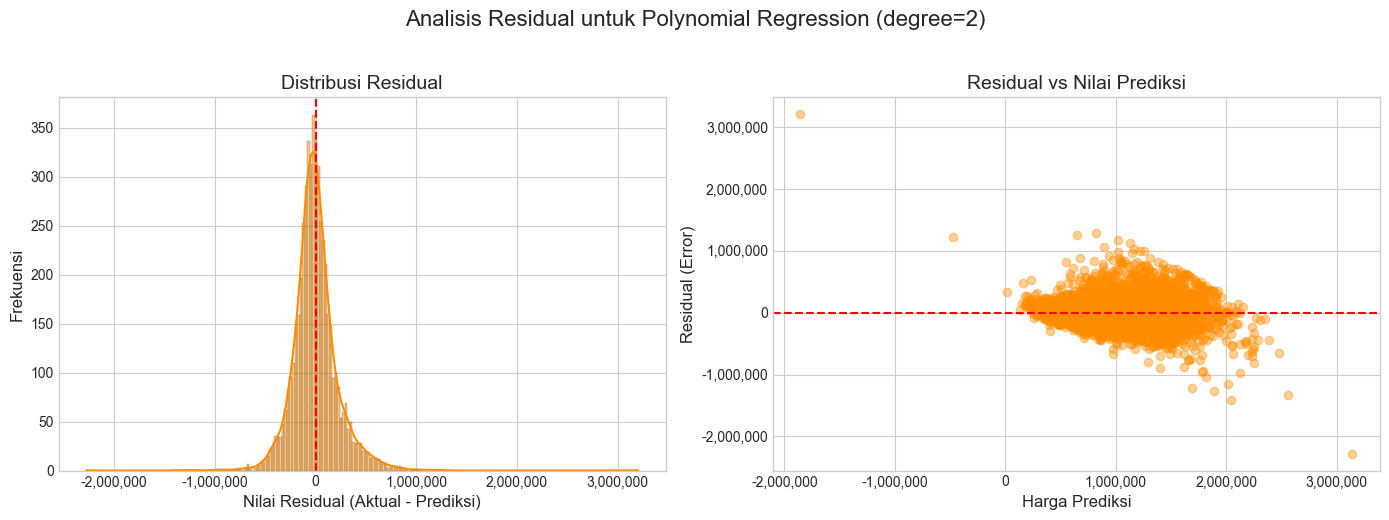

Plot residual membantu memeriksa asumsi model regresi:  
- **Distribusi Residual**: Idealnya, residual terdistribusi normal di sekitar nol (bentuk lonceng pada histogram).  
- **Residual vs Nilai Prediksi**: Idealnya, tidak ada pola yang jelas dalam scatter plot ini (homoskedastisitas); residual harus tersebar secara acak di sekitar garis horizontal nol. Pola tertentu dapat mengindikasikan masalah dengan model.

In [79]:
from matplotlib.ticker import FuncFormatter
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'models' in globals() and models and 'Linear Regression' in models and 'Polynomial Regression (degree=2)' in models and 'X_test' in globals() and X_test is not None and 'y_test' in globals() and y_test is not None and 'model_metrics' in globals() and model_metrics:
    print("Visualisasi Perbandingan Prediksi Model")
    print("="*50)

    # Define a number formatter function
    def number_formatter(x, pos):
        return '{:,.0f}'.format(x)
    formatter = FuncFormatter(number_formatter)

    # Ambil prediksi dari kedua model
    y_pred_lr = models['Linear Regression'].predict(X_test)
    y_pred_poly = models['Polynomial Regression (degree=2)'].predict(X_test)

    # Buat DataFrame untuk perbandingan
    comparison_df = pd.DataFrame({'Actual': y_test,
                                  'Linear Regression': y_pred_lr,
                                  'Polynomial Regression (degree=2)': y_pred_poly})

    # Ambil sampel kecil untuk visualisasi (misalnya 30 data pertama dari test set)
    sample_indices = X_test.index[:30]
    comparison_sample_df = comparison_df.loc[sample_indices].reset_index(drop=True)

    # --- 1. Plot Garis: Perbandingan Harga Aktual vs Prediksi (Sampel Data Uji) ---
    print("\n1. Perbandingan Harga Aktual vs Prediksi Model (30 Sampel Data Uji)")
    plt.figure(figsize=(15, 7))
    plt.plot(comparison_sample_df.index, comparison_sample_df['Actual'], label='Harga Aktual', marker='o', linestyle='-', color='black', linewidth=2, markersize=5)
    plt.plot(comparison_sample_df.index, comparison_sample_df['Linear Regression'], label='Prediksi Regresi Linear', marker='x', linestyle='--', color='dodgerblue', alpha=0.8)
    plt.plot(comparison_sample_df.index, comparison_sample_df['Polynomial Regression (degree=2)'], label='Prediksi Regresi Polinomial (d=2)', marker='^', linestyle=':', color='darkorange', alpha=0.8)

    plt.title('Perbandingan Harga Aktual vs Prediksi Model (30 Sampel Data Uji)', fontsize=16)
    plt.xlabel('Indeks Sampel Data Uji', fontsize=12)
    plt.ylabel('Harga Rumah', fontsize=12) # Diubah
    plt.gca().yaxis.set_major_formatter(formatter) # Apply number formatter
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    display(Markdown("Plot di atas menunjukkan perbandingan antara harga aktual dengan prediksi dari kedua model untuk 30 sampel pertama dari data uji. Ini membantu secara visual melihat seberapa dekat prediksi masing-masing model dengan nilai sebenarnya."))
    print("\nContoh data perbandingan (5 baris pertama dari sampel, harga diformat):")
    display(comparison_sample_df.head().style.format({'Actual': '{:,.0f}',      # Diubah
                                                      'Linear Regression': '{:,.0f}', # Diubah
                                                      'Polynomial Regression (degree=2)': '{:,.0f}'})) # Diubah
    print("="*50)

    # --- 2. Scatter Plots: Harga Aktual vs Prediksi (Seluruh Data Uji) ---
    print("\n2. Scatter Plot: Harga Aktual vs Prediksi (Seluruh Data Uji)")
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    models_to_plot = {
        'Linear Regression': y_pred_lr,
        'Polynomial Regression (degree=2)': y_pred_poly
    }
    plot_colors = ['steelblue', 'darkorange']

    for i, (model_name, y_pred_current) in enumerate(models_to_plot.items()):
        ax = axes[i]
        ax.scatter(y_test, y_pred_current, alpha=0.4, color=plot_colors[i], label='Prediksi vs Aktual')
        min_val = min(y_test.min(), y_pred_current.min())
        max_val = max(y_test.max(), y_pred_current.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Garis Prediksi Ideal')
        ax.set_title(f'Harga Aktual vs Prediksi\n({model_name})', fontsize=15)
        ax.set_xlabel('Harga Aktual', fontsize=12) # Diubah
        ax.set_ylabel('Harga Prediksi', fontsize=12) # Diubah
        ax.xaxis.set_major_formatter(formatter) # Apply number formatter
        ax.yaxis.set_major_formatter(formatter) # Apply number formatter
        ax.grid(True, alpha=0.3)
        r2_val = model_metrics[model_name]['R-squared']
        ax.annotate(f'R² = {r2_val:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        ax.legend()
    plt.tight_layout()
    plt.show()
    display(Markdown("Scatter plot di atas membandingkan harga aktual dengan harga prediksi untuk seluruh data uji. Titik-titik yang lebih dekat ke garis diagonal merah menunjukkan prediksi yang lebih akurat. R² menunjukkan seberapa baik model menjelaskan variabilitas harga."))
    print("="*50)

    # --- 3. Analisis Residual (Seluruh Data Uji) ---
    print("\n3. Analisis Residual Model (Seluruh Data Uji)")
    for i, (model_name, y_pred_current) in enumerate(models_to_plot.items()):
        residuals = y_test - y_pred_current
        fig_res, axes_res = plt.subplots(1, 2, figsize=(14, 5))
        fig_res.suptitle(f'Analisis Residual untuk {model_name}', fontsize=16, y=1.03)

        # Histogram Residual
        sns.histplot(residuals, kde=True, color=plot_colors[i], ax=axes_res[0])
        axes_res[0].axvline(0, color='r', linestyle='--')
        axes_res[0].set_title(f'Distribusi Residual', fontsize=14)
        axes_res[0].set_xlabel('Nilai Residual (Aktual - Prediksi)', fontsize=12) # Diubah
        axes_res[0].set_ylabel('Frekuensi', fontsize=12)
        axes_res[0].xaxis.set_major_formatter(formatter) # Apply number formatter

        # Scatter Plot Residual vs Prediksi
        axes_res[1].scatter(y_pred_current, residuals, alpha=0.4, color=plot_colors[i])
        axes_res[1].axhline(y=0, color='r', linestyle='--')
        axes_res[1].set_title(f'Residual vs Nilai Prediksi', fontsize=14)
        axes_res[1].set_xlabel('Harga Prediksi', fontsize=12) # Diubah
        axes_res[1].set_ylabel('Residual (Error)', fontsize=12) # Diubah
        axes_res[1].xaxis.set_major_formatter(formatter) # Apply number formatter
        axes_res[1].yaxis.set_major_formatter(formatter) # Apply number formatter
        
        plt.tight_layout()
        plt.show()
    display(Markdown("Plot residual membantu memeriksa asumsi model regresi:  \n"
                     "- **Distribusi Residual**: Idealnya, residual terdistribusi normal di sekitar nol (bentuk lonceng pada histogram).  \n"
                     "- **Residual vs Nilai Prediksi**: Idealnya, tidak ada pola yang jelas dalam scatter plot ini (homoskedastisitas); residual harus tersebar secara acak di sekitar garis horizontal nol. Pola tertentu dapat mengindikasikan masalah dengan model."))
    print("="*50)

else:
    print("Model Regresi Linear, Regresi Polinomial, data uji, atau metrik model tidak tersedia. Visualisasi perbandingan tidak dapat dibuat.")
    # Fallback for missing variables if needed for testing, ensure they are defined if running standalone
    if 'models' not in globals(): models = {}
    if 'X_test' not in globals(): X_test = None
    if 'y_test' not in globals(): y_test = None
    if 'model_metrics' not in globals(): model_metrics = {}



## Langkah 8: Analisis Tingkat Kepentingan Fitur (Feature Importance)
Menganalisis fitur mana yang paling berpengaruh pada prediksi model Regresi Linear. Koefisien model regresi linear dapat diinterpretasikan sebagai perubahan pada target untuk setiap satu unit perubahan pada fitur, dengan asumsi fitur lain konstan. Besarnya koefisien (nilai absolut) menunjukkan kekuatan pengaruh, sedangkan tanda (positif/negatif) menunjukkan arah pengaruh.

Analisis Tingkat Kepentingan Fitur (untuk Regresi Linear)
15 Fitur Terpenting Teratas (Regresi Linear):


,Fitur,Koefisien,Arah Dampak
26,cat__CouncilArea_Bayside City Council,421294.1763,Menaikkan harga
55,cat__CouncilArea_Wyndham City Council,-419540.1671,Menurunkan harga
44,cat__CouncilArea_Melton City Council,-370167.0924,Menurunkan harga
28,cat__CouncilArea_Brimbank City Council,-358533.9345,Menurunkan harga
27,cat__CouncilArea_Boroondara City Council,308185.8851,Menaikkan harga
32,cat__CouncilArea_Frankston City Council,296917.5521,Menaikkan harga
41,cat__CouncilArea_Maribyrnong City Council,-259847.5213,Menurunkan harga
39,cat__CouncilArea_Macedon Ranges Shire Council,239756.8282,Menaikkan harga
36,cat__CouncilArea_Hume City Council,-238220.2456,Menurunkan harga
50,cat__CouncilArea_Nillumbik Shire Council,-233615.6407,Menurunkan harga


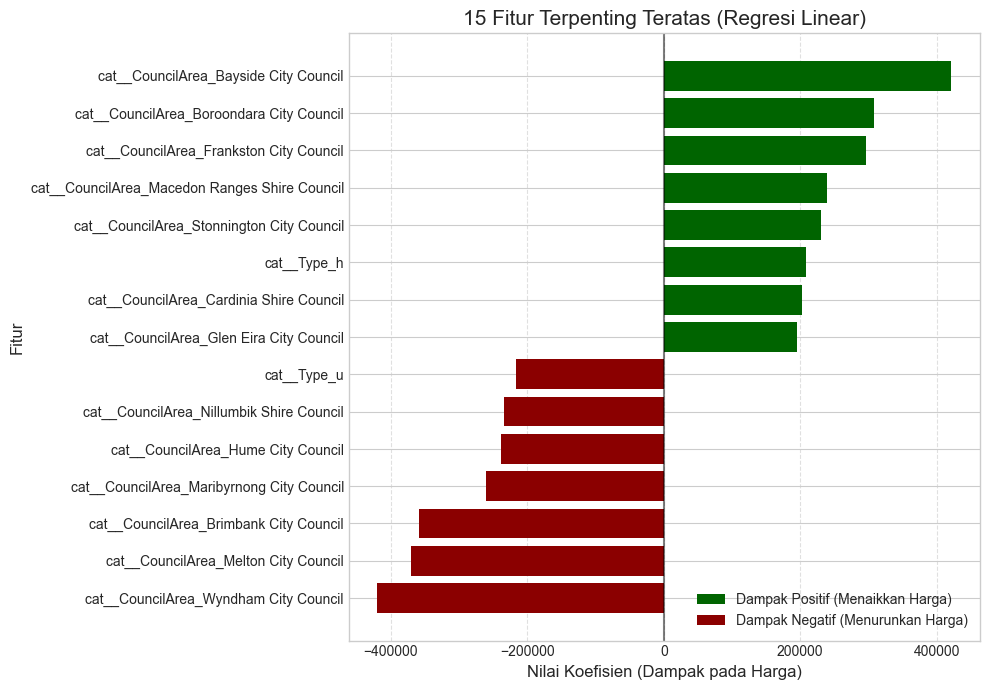

In [80]:
if 'Linear Regression' in models and preprocessor is not None:
    print("Analisis Tingkat Kepentingan Fitur (untuk Regresi Linear)")
    lr_model_pipeline = models['Linear Regression']

    try:
        feature_names_out = lr_model_pipeline.named_steps['preprocessor']\
                                .get_feature_names_out()

        coefficients = lr_model_pipeline.named_steps['regressor'].coef_

        if len(coefficients) == len(feature_names_out):
            importance_df = pd.DataFrame({'Fitur': feature_names_out, 'Koefisien': coefficients})
            importance_df['Koefisien Absolut'] = importance_df['Koefisien'].abs()
            importance_df = importance_df.sort_values('Koefisien Absolut', ascending=False).head(15)

            print("15 Fitur Terpenting Teratas (Regresi Linear):")
            importance_df_display = importance_df.copy()
            importance_df_display['Arah Dampak'] = ['Menaikkan harga' if x > 0 else 'Menurunkan harga' for x in importance_df_display['Koefisien']]
            display(importance_df_display[['Fitur', 'Koefisien', 'Arah Dampak']])

            plt.figure(figsize=(10, 7))
            plot_df_fi = importance_df.sort_values('Koefisien', ascending=True)
            colors_fi = ['darkred' if x < 0 else 'darkgreen' for x in plot_df_fi['Koefisien']]
            plt.barh(plot_df_fi['Fitur'], plot_df_fi['Koefisien'], color=colors_fi)
            plt.title('15 Fitur Terpenting Teratas (Regresi Linear)', fontsize=15)
            plt.xlabel('Nilai Koefisien (Dampak pada Harga)', fontsize=12)
            plt.ylabel('Fitur', fontsize=12)
            plt.grid(axis='x', linestyle='--', alpha=0.6); plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
            legend_elements_fi = [Patch(facecolor='darkgreen', label='Dampak Positif (Menaikkan Harga)'),
                                Patch(facecolor='darkred', label='Dampak Negatif (Menurunkan Harga)')]
            plt.legend(handles=legend_elements_fi, loc='lower right')
            plt.tight_layout(); plt.show()
        else:
            print(f"Ketidaksesuaian panjang koefisien ({len(coefficients)}) dan nama fitur ({len(feature_names_out)}). Tidak dapat memplot tingkat kepentingan fitur.")

    except Exception as e:
        print(f"Kesalahan saat mengekstrak tingkat kepentingan fitur: {e}")
        import traceback; traceback.print_exc()
else:
    print("Model Regresi Linear atau preprocessor tidak tersedia. Melewati Analisis Tingkat Kepentingan Fitur.")

## Langkah 9: Penyimpanan Model dan Preprocessor
Menyimpan model terlatih dan objek preprocessor ke disk untuk penggunaan di masa mendatang, misalnya untuk melakukan prediksi pada data baru tanpa perlu melatih ulang dari awal.

In [81]:
if models and preprocessor is not None and X_train is not None:
    print(f"Menyimpan Model dan Preprocessor ke {MODELS_DIR}")

    for model_name, model_pipeline in models.items():
        file_path = os.path.join(MODELS_DIR, f"{model_name.replace(' ', '_').lower()}.joblib")
        joblib.dump(model_pipeline, file_path)
        print(f"   Model '{model_name}' disimpan ke {file_path}")

    preprocessor_path = os.path.join(MODELS_DIR, 'preprocessor.joblib')
    joblib.dump(preprocessor, preprocessor_path)
    print(f"   Preprocessor disimpan ke {preprocessor_path}")

    feature_info = {
        'numerical_cols_used': actual_numerical_cols_used,
        'categorical_cols_used': actual_categorical_cols_used,
        'all_original_features_in_X_train': X_train.columns.tolist()
    }
    feature_info_path = os.path.join(MODELS_DIR, 'feature_info.joblib')
    joblib.dump(feature_info, feature_info_path)
    print(f"   Informasi fitur disimpan ke {feature_info_path}")

    if 'results_df' in globals() and results_df is not None and not results_df.empty:
        best_model_name_save = results_df['R-squared'].idxmax()
        with open(os.path.join(MODELS_DIR, 'best_model_name.txt'), 'w') as f:
            f.write(best_model_name_save)
        print(f"   Nama model terbaik '{best_model_name_save}' disimpan.")

    print("\nSemua model, preprocessor, dan informasi berhasil disimpan.")
else:
    print("Model, preprocessor, atau X_train tidak tersedia. Melewati proses penyimpanan.")

Menyimpan Model dan Preprocessor ke ./models
   Model 'Linear Regression' disimpan ke ./models/linear_regression.joblib
   Model 'Polynomial Regression (degree=2)' disimpan ke ./models/polynomial_regression_(degree=2).joblib
   Preprocessor disimpan ke ./models/preprocessor.joblib
   Informasi fitur disimpan ke ./models/feature_info.joblib
   Nama model terbaik 'Polynomial Regression (degree=2)' disimpan.

Semua model, preprocessor, dan informasi berhasil disimpan.


## Ringkasan dan Kesimpulan Pipeline

In [86]:
from IPython.display import display, Markdown, HTML
import pandas as pd

summary_header = HTML("<h2 style='text-align:center'>Ringkasan Eksekusi Pipeline</h2>")
display(summary_header)
display(HTML("<hr style='border-top: 2px solid #333; margin-bottom: 20px'>"))

if 'df_raw' not in globals() or df_raw is None:
    display(Markdown("### **GAGAL**: Pemuatan data awal gagal atau dilewati"))
    display(Markdown("- **Kemungkinan penyebab**: File dataset tidak ditemukan atau path tidak valid"))
    display(Markdown("- **Solusi**: Pastikan file 'Melbourne_housing_FULL.csv' tersedia di direktori './data/'"))
elif 'df_processed' not in globals() or df_processed is None or df_processed.empty:
    display(Markdown("### **GAGAL**: Pra-pemrosesan data gagal atau menghasilkan DataFrame kosong"))
    display(Markdown(f"- **Jumlah baris awal**: {df_raw.shape[0] if df_raw is not None else 'Tidak tersedia'}"))
    display(Markdown("- **Kemungkinan penyebab**: Penghapusan baris dengan nilai yang hilang atau outlier terlalu agresif"))
    display(Markdown("- **Solusi**: Periksa parameter penanganan missing values dan outlier"))
elif 'X_train' not in globals() or X_train is None:
    display(Markdown("### **GAGAL**: Pembagian data gagal"))
    display(Markdown("- **Kemungkinan penyebab**: Tidak ada kolom fitur yang valid tersisa setelah pra-pemrosesan"))
    display(Markdown("- **Solusi**: Periksa pemilihan fitur dan pastikan minimal ada satu fitur numerik dan kategorikal"))
elif not models:
    display(Markdown("### **GAGAL**: Pelatihan model gagal atau dilewati"))
    display(Markdown("- **Kemungkinan penyebab**: Error pada preprocessor atau model regresi"))
    display(Markdown("- **Solusi**: Periksa log error dan pengaturan pipeline model"))
elif not model_metrics:
    display(Markdown("###  **GAGAL**: Evaluasi model gagal atau dilewati"))
    display(Markdown("- **Kemungkinan penyebab**: Model valid tetapi prediksi pada data uji gagal"))
    display(Markdown("- **Solusi**: Periksa kecocokan format data pelatihan dan pengujian"))
else:
    display(Markdown("###  **SUKSES**: Pipeline telah berjalan melalui semua langkah utama"))
    
    # Buat DataFrame informasi
    info_data = [
        ["Data awal", f"{df_raw.shape[0]} baris, {df_raw.shape[1]} kolom"],
        ["Data setelah pra-pemrosesan", f"{df_processed.shape[0]} baris, {df_processed.shape[1]} kolom"],
        ["Rasio split pelatihan/pengujian", f"{len(X_train)}/{len(X_test)} ({len(X_train)/len(df_processed):.1%}/{len(X_test)/len(df_processed):.1%})"],
        ["Model yang dilatih", f"{', '.join(models.keys()) if models else 'Tidak ada'}"]
    ]
    info_df = pd.DataFrame(info_data, columns=["Parameter", "Nilai"])
    display(info_df.style.set_properties(**{'text-align': 'left'}))
    
    if 'results_df' in globals() and results_df is not None and not results_df.empty:
        best_model_final = results_df['R-squared'].idxmax()
        best_r2 = results_df.loc[best_model_final, 'R-squared']
        best_rmse = results_df.loc[best_model_final, 'RMSE']
        best_mae = results_df.loc[best_model_final, 'MAE']
        
        display(Markdown("### Hasil Model Terbaik"))
        
        # Buat DataFrame hasil model terbaik
        best_model_data = [
            ["Nama model", best_model_final],
            ["R-squared", f"{best_r2:.4f} (Model menjelaskan {best_r2*100:.1f}% variasi harga)"],
            ["RMSE", f"${best_rmse:,.2f} (Rata-rata kesalahan prediksi harga)"],
            ["MAE", f"${best_mae:,.2f} (Median kesalahan prediksi harga)"]
        ]
        best_model_df = pd.DataFrame(best_model_data, columns=["Metrik", "Nilai"])
        display(best_model_df.style.set_properties(**{'text-align': 'left'}))
        
        # Tambahkan perbandingan antar model jika ada lebih dari 1 model
        if len(results_df) > 1:
            other_models = [m for m in results_df.index if m != best_model_final]
            second_best = results_df.loc[other_models, 'R-squared'].idxmax()
            improvement = ((best_r2 - results_df.loc[second_best, 'R-squared']) / 
                          results_df.loc[second_best, 'R-squared']) * 100
            
            display(Markdown("### Perbandingan Model"))
            display(Markdown(f"**{best_model_final}** lebih baik **{improvement:.1f}%** dari **{second_best}** (berdasarkan R-squared)"))

display(HTML("<hr style='border-top: 2px solid #333; margin-top: 20px'>"))

###  **SUKSES**: Pipeline telah berjalan melalui semua langkah utama

,Parameter,Nilai
0,Data awal,"34857 baris, 21 kolom"
1,Data setelah pra-pemrosesan,"25969 baris, 21 kolom"
2,Rasio split pelatihan/pengujian,20775/5194 (80.0%/20.0%)
3,Model yang dilatih,"Linear Regression, Polynomial Regression (degree=2)"


### Hasil Model Terbaik

,Metrik,Nilai
0,Nama model,Polynomial Regression (degree=2)
1,R-squared,0.7199 (Model menjelaskan 72.0% variasi harga)
2,RMSE,"$226,966.08 (Rata-rata kesalahan prediksi harga)"
3,MAE,"$156,562.02 (Median kesalahan prediksi harga)"


### Perbandingan Model

**Polynomial Regression (degree=2)** lebih baik **8.6%** dari **Linear Regression** (berdasarkan R-squared)

# Kesimpulan

Dokumen ini menyajikan ringkasan menyeluruh dari proyek prediksi harga rumah di Melbourne, Australia. Proyek ini menggunakan dataset dari Kaggle ("Melbourne Housing Market") untuk membangun dan mengevaluasi model Regresi Linear dan Regresi Polinomial. Tujuannya adalah untuk mengestimasi harga rumah berdasarkan berbagai fitur properti.

## 1. Pendahuluan dan Tujuan Proyek

Proyek ini bertujuan untuk:
1.  Menganalisis dataset pasar perumahan Melbourne untuk memahami faktor-faktor yang memengaruhi harga.
2.  Membangun model prediktif menggunakan Regresi Linear dan Regresi Polinomial.
3.  Mengevaluasi performa model-model tersebut menggunakan metrik standar.
4.  Mengidentifikasi fitur-fitur yang paling signifikan dalam menentukan harga rumah.
5.  Menyediakan penjelasan matematis dan langkah-langkah implementasi (termasuk perhitungan manual konseptual) untuk setiap model.

## 2. Dataset

-   **Sumber**: [Kaggle - Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data)
-   **Deskripsi**: Berisi informasi properti di Melbourne, termasuk fitur-fitur seperti:
    -   `Suburb`: Nama wilayah pinggiran kota
    -   `Rooms`: Jumlah ruangan
    -   `Type`: Tipe properti (misalnya, 'h' untuk rumah, 'u' untuk unit)
    -   `Price`: Harga properti (variabel target, dalam dolar Australia)
    -   `Method`: Metode penjualan
    -   `Distance`: Jarak dari Central Business District (CBD)
    -   `Bedroom2`: Jumlah kamar tidur
    -   `Bathroom`: Jumlah kamar mandi
    -   `Car`: Jumlah tempat parkir mobil
    -   `Landsize`: Luas tanah (m²)
    -   `BuildingArea`: Luas bangunan (m²)
    -   `YearBuilt`: Tahun dibangun
    -   `CouncilArea`: Pemerintah daerah
    -   `Regionname`: Wilayah umum
    -   `Propertycount`: Jumlah properti di wilayah tersebut
-   **Variabel Target**: `Price`

## 3. Alur Kerja Pipeline Proyek

Pipeline proyek mengikuti langkah-langkah standar dalam machine learning:

### 3.1. Pemuatan Data
Dataset dimuat dari file `Melbourne_housing_FULL.csv` ke dalam DataFrame Pandas. Informasi awal seperti dimensi data dan beberapa baris pertama ditampilkan.

### 3.2. Eksplorasi Data Awal (EDA) - Ringkasan Temuan
Analisis eksploratif dilakukan untuk memahami data lebih dalam:
-   **Informasi Dasar**: Tipe data dan nilai non-null diperiksa.
-   **Nilai yang Hilang**:
    -   Kolom seperti `BuildingArea` (sekitar 60.6% hilang), `YearBuilt` (55.4% hilang), dan `Landsize` (33.9% hilang) memiliki persentase data hilang yang signifikan.
    -   Kolom target `Price` juga memiliki sekitar 21.8% nilai yang hilang.
-   **Distribusi Variabel Target (`Price`):**
    -   Distribusi harga cenderung miring ke kanan (right-skewed), yang umum untuk data harga.
    -   Terdapat potensi outlier pada harga yang sangat tinggi.
    -   Harga rata-rata sekitar AUD 1,050,173 dan median AUD 870,000 sebelum penanganan outlier.
-   **Analisis Fitur Numerik**: Statistik deskriptif (mean, median, std, min, max) dihitung.
-   **Analisis Fitur Kategorikal**: Frekuensi kategori unik dianalisis. Misalnya, tipe properti 'h' (rumah) adalah yang paling umum.
-   **Matriks Korelasi**:
    -   `Rooms`, `Bedroom2`, `Bathroom` menunjukkan korelasi positif yang cukup baik dengan `Price` (masing-masing sekitar 0.47, 0.43, 0.43).
    -   `Distance` memiliki korelasi negatif dengan `Price` (sekitar -0.21), yang berarti harga cenderung turun seiring bertambahnya jarak dari CBD.
    -   `YearBuilt` memiliki korelasi negatif kecil (sekitar -0.33), menunjukkan bahwa rumah yang lebih baru tidak selalu lebih mahal, atau faktor lain lebih dominan.

### 3.3. Pra-pemrosesan Data
Langkah-langkah untuk membersihkan dan menyiapkan data untuk pemodelan:
1.  **Penanganan Nilai yang Hilang**:
    -   Fitur numerik: Nilai yang hilang diisi dengan **median** dari masing-masing kolom.
    -   Fitur kategorikal: Nilai yang hilang diisi dengan **modus** (nilai yang paling sering muncul) dari masing-masing kolom.
2.  **Penanganan Target**: Baris dengan nilai `Price` yang hilang dihapus.
3.  **Penanganan Outlier (pada `Price`)**: Outlier pada kolom `Price` ditangani menggunakan metode Interquartile Range (IQR). Data di luar rentang $[Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]$ dihapus. Ini menghasilkan rentang harga yang lebih sempit, misalnya dari AUD 85,000 hingga AUD 2,285,000 setelah penanganan.
4.  **Penghapusan Duplikat**: Baris data yang duplikat sepenuhnya dihapus.
Proses ini mengurangi jumlah sampel dari sekitar 34,857 menjadi sekitar 25,969 baris.

### 3.4. Pembagian Data (Train-Test Split)
Dataset yang telah diproses (`df_processed`) dibagi menjadi set pelatihan dan set pengujian dengan rasio 80:20. `random_state=42` digunakan untuk reproduktibilitas.
-   `X_train`, `y_train`: Untuk melatih model.
-   `X_test`, `y_test`: Untuk mengevaluasi model.

### 3.5. Pembangunan dan Pelatihan Model

#### 3.5.1. Preprocessor
Sebuah `ColumnTransformer` didefinisikan untuk menerapkan transformasi yang berbeda pada tipe kolom yang berbeda:
-   **Untuk Fitur Numerik (`NUMERICAL_COLS`):**
    1.  `SimpleImputer(strategy='median')`: Mengisi nilai yang hilang dengan median.
    2.  `StandardScaler()`: Menstandarisasi fitur dengan menghilangkan mean dan menskalakan ke unit varians (z-score normalization).
-   **Untuk Fitur Kategorikal (`CATEGORICAL_COLS`):**
    1.  `SimpleImputer(strategy='most_frequent')`: Mengisi nilai yang hilang dengan modus.
    2.  `OneHotEncoder(handle_unknown='ignore', sparse_output=False)`: Mengubah fitur kategorikal menjadi representasi one-hot. `handle_unknown='ignore'` berarti kategori baru di data tes akan diabaikan (semua kolom one-hot terkait akan bernilai nol).

#### 3.5.2. Model 1: Regresi Linear

**Konsep Dasar & Rumus Matematis:**
Regresi Linear bertujuan menemukan hubungan linear terbaik antara fitur ($X$) dan target ($y$).
Persamaan model:
$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n $$
Di mana:
- $ \hat{y} $ adalah nilai target yang diprediksi.
- $ \beta_0 $ adalah intersep (bias).
- $ \beta_1, \dots, \beta_n $ adalah koefisien untuk fitur $x_1, \dots, x_n$.
Tujuan pelatihan adalah menemukan koefisien $ \beta $ yang meminimalkan Sum of Squared Errors (SSE) atau Residual Sum of Squares (RSS):
$$ SSE = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$
Solusi Ordinary Least Squares (OLS) untuk $ \beta $ adalah:
$$ \hat{\beta} = (X^T X)^{-1} X^T y $$

**Pelatihan Model (Scikit-learn):**
Sebuah `Pipeline` dibuat yang menggabungkan `preprocessor` dan `LinearRegression()`. Model dilatih menggunakan `lr_pipeline.fit(X_train, y_train)`.

**Langkah-langkah Perhitungan Manual (Konseptual):**
1.  **Persiapan Data**: Ambil `X_train` (fitur) dan `y_train` (target).
2.  **Preprocessing `X_train`**:
    a.  **Imputasi Numerik**: Untuk setiap kolom numerik di `X_train`, hitung mediannya. Ganti semua nilai NaN di kolom tersebut dengan mediannya.
    b.  **Scaling Numerik**: Untuk setiap kolom numerik yang sudah diimputasi, hitung mean ($\mu$) dan standar deviasi ($\sigma$). Transformasi setiap nilai $x$ menjadi $z = (x - \mu) / \sigma$.
    c.  **Imputasi Kategorikal**: Untuk setiap kolom kategorikal di `X_train`, temukan modusnya. Ganti semua nilai NaN di kolom tersebut dengan modusnya.
    d.  **One-Hot Encoding Kategorikal**: Ubah setiap kolom kategorikal menjadi beberapa kolom biner. Misalnya, jika 'Tipe' memiliki kategori ['h', 'u', 't'], maka akan menjadi tiga kolom: 'Tipe_h', 'Tipe_u', 'Tipe_t'.
    e.  Gabungkan semua fitur yang telah diproses ini menjadi matriks akhir $X_{train\_proc}$.
3.  **Tambahkan Kolom Intersep**: Tambahkan satu kolom berisi angka 1 ke $X_{train\_proc}$ untuk mengakomodasi koefisien intersep $\beta_0$. (Catatan: `LinearRegression` Scikit-learn menangani ini secara internal jika `fit_intercept=True`, yang merupakan default).
4.  **Hitung Koefisien $\hat{\beta}$ menggunakan OLS**:
    $$ \hat{\beta} = (X_{train\_proc}^T X_{train\_proc})^{-1} X_{train\_proc}^T y_{train} $$
    Ini melibatkan operasi matriks: transpose, perkalian, invers, dan perkalian lagi.
5.  **Prediksi**: Untuk data baru $X_{new}$ (yang juga harus melalui langkah preprocessing yang sama menggunakan statistik dari `X_train` untuk menjadi $X_{new\_proc}$ dan penambahan kolom intersep):
    $$ \hat{y}_{new} = X_{new\_proc} \hat{\beta} $$

#### 3.5.3. Model 2: Regresi Polinomial (Derajat 2)

**Konsep Dasar & Rumus Matematis:**
Memodelkan hubungan non-linear dengan menambahkan fitur polinomial. Untuk satu fitur $x$ dan derajat $d=2$:
$$ \hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 $$
Jika ada beberapa fitur, fitur interaksi juga dibuat (misalnya, $x_1 x_2$).

**Pelatihan Model (Scikit-learn):**
Sebuah `Pipeline` dibuat: `preprocessor` -> `PolynomialFeatures(degree=2, include_bias=False)` -> `LinearRegression()`. Model dilatih menggunakan `poly2_pipeline.fit(X_train, y_train)`. `PolynomialFeatures` menghasilkan fitur-fitur baru ($x_i, x_i^2, x_i x_j$, dll.) dari output preprocessor.

**Langkah-langkah Perhitungan Manual (Konseptual):**
1.  **Persiapan Data & Preprocessing `X_train`**: Sama seperti pada Regresi Linear, menghasilkan $X_{train\_proc}$ dan `y_train`.
2.  **Transformasi Fitur Polinomial**:
    a.  Ambil $X_{train\_proc}$.
    b.  Untuk setiap sampel $(x_1, \dots, x_k)$ dalam $X_{train\_proc}$, buat fitur-fitur baru hingga derajat 2. Ini termasuk fitur asli ($x_1, \dots, x_k$), fitur kuadratik ($x_1^2, \dots, x_k^2$), dan fitur interaksi ($x_1x_2, x_1x_3, \dots, x_{k-1}x_k$).
    c.  Bentuk matriks baru $X_{train\_poly}$ dari fitur-fitur yang telah diperluas ini.
3.  **Tambahkan Kolom Intersep**: Tambahkan satu kolom berisi angka 1 ke $X_{train\_poly}$.
4.  **Hitung Koefisien $\hat{\beta}$ menggunakan OLS**:
    $$ \hat{\beta} = (X_{train\_poly}^T X_{train\_poly})^{-1} X_{train\_poly}^T y_{train} $$
5.  **Prediksi**: Untuk data baru $X_{new}$ (setelah preprocessing menjadi $X_{new\_proc}$, transformasi polinomial menjadi $X_{new\_poly}$, dan penambahan kolom intersep):
    $$ \hat{y}_{new} = X_{new\_poly} \hat{\beta} $$

### 3.6. Evaluasi Model
Performa model dievaluasi pada `X_test` dan `y_test` menggunakan metrik berikut:
-   **R-squared (R²)**: Proporsi varians dalam variabel target yang dapat diprediksi.
    $$ R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} = 1 - \frac{\sum_{i=1}^{m} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{m} (y_i - \bar{y})^2} $$
    Nilai lebih tinggi lebih baik (maksimum 1).
-   **Mean Squared Error (MSE)**: Rata-rata dari kuadrat error.
    $$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$
    Nilai lebih rendah lebih baik.
-   **Root Mean Squared Error (RMSE)**: Akar kuadrat dari MSE, dalam satuan yang sama dengan target.
    $$ \text{RMSE} = \sqrt{\text{MSE}} $$
    Nilai lebih rendah lebih baik.
-   **Mean Absolute Error (MAE)**: Rata-rata dari error absolut.
    $$ \text{MAE} = \frac{1}{m} \sum_{i=1}^{m} |y_i - \hat{y}_i| $$
    Nilai lebih rendah lebih baik, kurang sensitif terhadap outlier dibandingkan RMSE.

### 3.7. Visualisasi Hasil
Hasil evaluasi dan prediksi divisualisasikan untuk pemahaman yang lebih baik:
-   Perbandingan skor R² dan RMSE antar model menggunakan bar plot.
-   Plot sebar (scatter plot) antara harga aktual vs. harga prediksi untuk model terbaik.
-   Plot residual (distribusi residual dan residual vs. nilai prediksi) untuk model terbaik, guna memeriksa asumsi model.
-   Plot garis perbandingan harga aktual vs. prediksi untuk sampel data uji.

### 3.8. Analisis Tingkat Kepentingan Fitur (Feature Importance)
Untuk model Regresi Linear, koefisien ($\beta_j$) dianalisis:
-   Koefisien diekstrak dari model terlatih.
-   Nama fitur didapatkan dari `preprocessor.get_feature_names_out()`.
-   Fitur-fitur diurutkan berdasarkan nilai absolut koefisiennya untuk melihat dampak terbesar.
-   Tanda koefisien (positif/negatif) menunjukkan arah pengaruh fitur terhadap harga.
-   Contoh fitur penting (berdasarkan koefisien absolut terbesar dari model Linear): `cat__CouncilArea_Bayside City Council` (positif), `cat__CouncilArea_Wyndham City Council` (negatif), `cat__Type_u` (negatif), `num__YearBuilt` (negatif), `num__Rooms` (positif).

### 3.9. Penyimpanan Model dan Preprocessor
Model-model yang telah dilatih (`lr_pipeline`, `poly2_pipeline`), objek `preprocessor`, dan informasi fitur (`actual_numerical_cols_used`, `actual_categorical_cols_used`) disimpan ke disk menggunakan `joblib.dump()` untuk penggunaan di masa mendatang. Nama model terbaik juga disimpan.

## 4. Hasil Numerik Utama

-   **Data Awal**: 34,857 baris, 21 kolom.
-   **Data Setelah Pra-pemrosesan**: 25,969 baris, 21 kolom.
-   **Pembagian Data**: 20,775 sampel pelatihan (80.0%), 5,194 sampel pengujian (20.0%).

-   **Performa Model pada Data Uji:**
    -   **Regresi Linear**:
        -   R-squared: 0.6628
        -   MSE: 62,014,687,983
        -   RMSE: AUD 249,027.48
        -   MAE: AUD 188,699.49
    -   **Regresi Polinomial (derajat=2)**:
        -   R-squared: 0.7199
        -   MSE: 51,513,602,234
        -   RMSE: AUD 226,966.08
        -   MAE: AUD 156,562.02

-   **Model Terbaik (berdasarkan R-squared tertinggi)**: **Polynomial Regression (degree=2)**
    -   Model ini mampu menjelaskan sekitar **72.0%** varians dalam harga rumah.
    -   Rata-rata kesalahan prediksi (RMSE) adalah sekitar **AUD 226,966**.
    -   Model Regresi Polinomial (derajat 2) menunjukkan performa sekitar 8.6% lebih baik daripada Regresi Linear berdasarkan R-squared.

## 5. Kesimpulan

Linear regression dan juga Polynomial Regression berhasil diimplementasikan untuk memprediksi harga rumah di Melbourne.
1.  **EDA** mengungkapkan wawasan penting tentang data, termasuk distribusi harga yang miring dan korelasi antar fitur.
2.  **Pra-pemrosesan** data, termasuk imputasi nilai yang hilang dan penanganan outlier, sangat krusial untuk menyiapkan data.
3.  **Regresi Polinomial (derajat 2)** menunjukkan performa yang lebih baik dibandingkan Regresi Linear sederhana pada dataset ini, dengan R² sebesar 0.7199. Ini mengindikasikan bahwa terdapat hubungan non-linear antara fitur dan harga rumah yang dapat ditangkap oleh model polinomial.
4.  **Analisis kepentingan fitur** dari model linear menunjukkan bahwa baik fitur numerik (seperti jumlah kamar, tahun dibangun) maupun fitur kategorikal (seperti wilayah dewan pemerintahan dan tipe properti) memiliki pengaruh signifikan terhadap harga.
5.  Model dan preprocessor yang telah dilatih **disimpan** untuk potensi penggunaan di masa depan, seperti deployment atau prediksi pada data baru.

Meskipun model Regresi Polinomial memberikan hasil yang lebih baik, RMSE sebesar AUD 226,966 masih cukup tinggi, menunjukkan bahwa ada ruang untuk perbaikan lebih lanjut. Ini bisa melibatkan eksplorasi fitur yang lebih canggih (feature engineering), penggunaan model yang lebih kompleks, atau tuning hyperparameter yang lebih ekstensif.